# 1. EXTRACT – Build or prepare a dataset

## Layoff data

### Setup and Initial Data Load

In [28]:
import pandas as pd
import numpy as np


df_layoffs = pd.read_csv('./data/layoffs/layoffs_data.csv') 

print(f"Data shape after initial load: {df_layoffs.shape}")
df_layoffs.head()

Data shape after initial load: (3642, 12)


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


### Data Type Conversion

In [29]:
df_layoffs['Date'] = pd.to_datetime(df_layoffs['Date'], errors='coerce')
    
df_layoffs.dropna(subset=['Date'], inplace=True)
    
df_layoffs.sort_values(by='Date', inplace=True)
    
df_layoffs['Company'] = df_layoffs['Company'].astype(str).str.strip().str.lower()
    
print("Date column converted, data sorted, and Company names standardized.")
print(f"Data shape after date cleaning: {df_layoffs.shape}")
df_layoffs.head()

Date column converted, data sorted, and Company names standardized.
Data shape after date cleaning: (3642, 12)


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
3641,easypost,Salt Lake City,Logistics,75.0,2020-03-11,https://www.bizjournals.com/louisville/news/20...,12.0,Series A,2020-03-31 13:21:54,United States,NaN,Unknown
3640,tamara mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown
3638,hopskipdrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,panda squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3637,service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown


### Handling Missing Layoff Metrics

In [27]:
df_layoffs['Inferred_Total_Employees'] = np.where(
    (df_layoffs['Percentage'].notna()) & (df_layoffs['Percentage'] > 0),
    df_layoffs['Laid_Off_Count'] / df_layoffs['Percentage'],
    np.nan
)

df_layoffs['Laid_Off_Count'] = df_layoffs['Laid_Off_Count'].fillna(0)
df_layoffs['Percentage'] = df_layoffs['Percentage'].fillna(0)

df_layoffs['Funds_Raised'] = df_layoffs['Funds_Raised'].fillna(0)

print("Layoff counts, percentages, and funds raised NaNs handled.")
print("\nMissing values after initial metric handling:")
print(df_layoffs[['Laid_Off_Count', 'Percentage', 'Funds_Raised']].isnull().sum())
df_layoffs.sample(5)

Layoff counts, percentages, and funds raised NaNs handled.

Missing values after initial metric handling:
Laid_Off_Count    0
Percentage        0
Funds_Raised      0
dtype: int64


,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off,Inferred_Total_Employees,Month
2088,signicat,Trondheim,Security,0.0,2022-11-02,https://www.signicat.com/press-releases/signic...,8.0,Acquired,2022-11-07 19:11:58,Norway,0.0,Unknown,NaN,2022-11
532,blue origin,Seattle,Aerospace,40.0,2023-10-09,https://www.theinformation.com/briefings/blue-...,167.0,Unknown,2023-10-09 15:27:58,United States,0.0,Unknown,NaN,2023-10
1816,vedantu,Bengaluru,Education,385.0,2022-12-07,https://economictimes.indiatimes.com/tech/star...,292.0,Series E,2022-12-07 16:28:02,India,0.0,Unknown,NaN,2022-12
1920,assure,Salt Lake City,Finance,0.0,2022-11-23,https://www.axios.com/2022/11/23/assure-shutdo...,2.0,Seed,2022-11-25 04:07:03,United States,1.0,Unknown,0.0,2022-11
1659,hashicorp,SF Bay Area,Security,69.0,2023-01-11,https://www.linkedin.com/news/story/former-cit...,349.0,Post-IPO,2023-01-12 15:41:41,United States,0.0,Unknown,NaN,2023-01


### Aggregate to company-month level

In [30]:
df_layoffs['Month'] = df_layoffs['Date'].dt.to_period('M')

layoff_monthly = df_layoffs.groupby(['Company', 'Month']).agg(
    Layoff_Event_Count=('Date', 'size'),
    Total_Laid_Off_Sum=('Laid_Off_Count', 'sum'),
    Avg_Layoff_Percentage=('Percentage', 'mean'),
    Latest_Industry=('Industry', 'last'),
    Latest_Country=('Country', 'last'),
    Latest_Stage=('Stage', 'last'),
    Latest_Funds_Raised=('Funds_Raised', 'max')
).reset_index()

layoff_monthly['Date'] = layoff_monthly['Month'].dt.to_timestamp()
layoff_monthly['Layoff_Event_Binary'] = 1

layoff_monthly = layoff_monthly.drop('Month', axis=1)

print(f"Monthly aggregated shape: {layoff_monthly.shape}")
layoff_monthly.head(5)

Monthly aggregated shape: (3596, 10)


,Company,Layoff_Event_Count,Total_Laid_Off_Sum,Avg_Layoff_Percentage,Latest_Industry,Latest_Country,Latest_Stage,Latest_Funds_Raised,Date,Layoff_Event_Binary
0,#paid,1,19.0,0.17,Marketing,Canada,Series B,21.0,2023-01-01,1
1,&open,1,9.0,0.09,Marketing,Ireland,Series A,35.0,2022-11-01,1
2,100 thieves,1,12.0,NaN,Consumer,United States,Series C,120.0,2022-07-01,1
3,100 thieves,1,0.0,NaN,Retail,United States,Series C,120.0,2023-01-01,1
4,10x genomics,1,100.0,0.08,Healthcare,United States,Post-IPO,242.0,2022-08-01,1


### Create Full Company-Month Panel

In [37]:
# Get all unique companies and date range
all_companies = layoff_monthly['Company'].unique()
min_date = layoff_monthly['Date'].min()
max_date = layoff_monthly['Date'].max()

all_months = pd.date_range(start=min_date, end=max_date, freq='MS')

# Create complete panel
from itertools import product
full_index = pd.DataFrame(
    list(product(all_companies, all_months)),
    columns=['Company', 'Date']
)

# Merge with layoff data
df_panel = full_index.merge(layoff_monthly, on=['Company', 'Date'], how='left')

df_panel['Layoff_Event_Binary'] = df_panel['Layoff_Event_Binary'].fillna(0)
df_panel['Total_Laid_Off_Sum'] = df_panel['Total_Laid_Off_Sum'].fillna(0)
df_panel['Avg_Layoff_Percentage'] = df_panel['Avg_Layoff_Percentage'].fillna(0)
df_panel['Layoff_Event_Count'] = df_panel['Layoff_Event_Count'].fillna(0)

df_panel = df_panel.sort_values(['Company', 'Date']).reset_index(drop=True)

print(f"Full panel shape: {df_panel.shape}")
print(f"Layoff events: {df_panel['Layoff_Event_Binary'].sum():.0f}")
print(f"\nSample company timeline:")
df_panel[df_panel['Company'] == 'apple'][['Company', 'Date', 'Layoff_Event_Binary', 'Total_Laid_Off_Sum']].head(10)

Full panel shape: (134472, 10)
Layoff events: 3596

Sample company timeline:


,Company,Date,Layoff_Event_Binary,Total_Laid_Off_Sum
6188,apple,2020-03-01,0.0,0.0
6189,apple,2020-04-01,0.0,0.0
6190,apple,2020-05-01,0.0,0.0
6191,apple,2020-06-01,0.0,0.0
6192,apple,2020-07-01,0.0,0.0
6193,apple,2020-08-01,0.0,0.0
6194,apple,2020-09-01,0.0,0.0
6195,apple,2020-10-01,0.0,0.0
6196,apple,2020-11-01,0.0,0.0
6197,apple,2020-12-01,0.0,0.0


### Forward Fill Company Attributes

In [38]:
# Forward fill company attributes within each company
df_panel['Latest_Industry'] = df_panel.groupby('Company')['Latest_Industry'].ffill()
df_panel['Latest_Country'] = df_panel.groupby('Company')['Latest_Country'].ffill()
df_panel['Latest_Stage'] = df_panel.groupby('Company')['Latest_Stage'].ffill()
df_panel['Latest_Funds_Raised'] = df_panel.groupby('Company')['Latest_Funds_Raised'].ffill()

# Backward fill for companies where first month has layoff
df_panel['Latest_Industry'] = df_panel.groupby('Company')['Latest_Industry'].bfill()
df_panel['Latest_Country'] = df_panel.groupby('Company')['Latest_Country'].bfill()
df_panel['Latest_Stage'] = df_panel.groupby('Company')['Latest_Stage'].bfill()

# Fill remaining NaNs with "Unknown"
df_panel['Latest_Industry'] = df_panel['Latest_Industry'].fillna('Unknown')
df_panel['Latest_Country'] = df_panel['Latest_Country'].fillna('Unknown')
df_panel['Latest_Stage'] = df_panel['Latest_Stage'].fillna('Unknown')
df_panel['Latest_Funds_Raised'] = df_panel['Latest_Funds_Raised'].fillna(0)

print("Company attributes filled")
print(f"\nMissing values:")
print(df_panel.isnull().sum())
print(f"\nSample with attributes:")
df_panel[df_panel['Company'] == 'apple'][['Company', 'Date', 'Latest_Industry', 'Latest_Stage', 'Layoff_Event_Binary']].head(5)

Company attributes filled

Missing values:
Company                  0
Date                     0
Layoff_Event_Count       0
Total_Laid_Off_Sum       0
Avg_Layoff_Percentage    0
Latest_Industry          0
Latest_Country           0
Latest_Stage             0
Latest_Funds_Raised      0
Layoff_Event_Binary      0
dtype: int64

Sample with attributes:


,Company,Date,Latest_Industry,Latest_Stage,Layoff_Event_Binary
6188,apple,2020-03-01,Retail,Post-IPO,0.0
6189,apple,2020-04-01,Retail,Post-IPO,0.0
6190,apple,2020-05-01,Retail,Post-IPO,0.0
6191,apple,2020-06-01,Retail,Post-IPO,0.0
6192,apple,2020-07-01,Retail,Post-IPO,0.0


### Basic EDA - Layoff Data

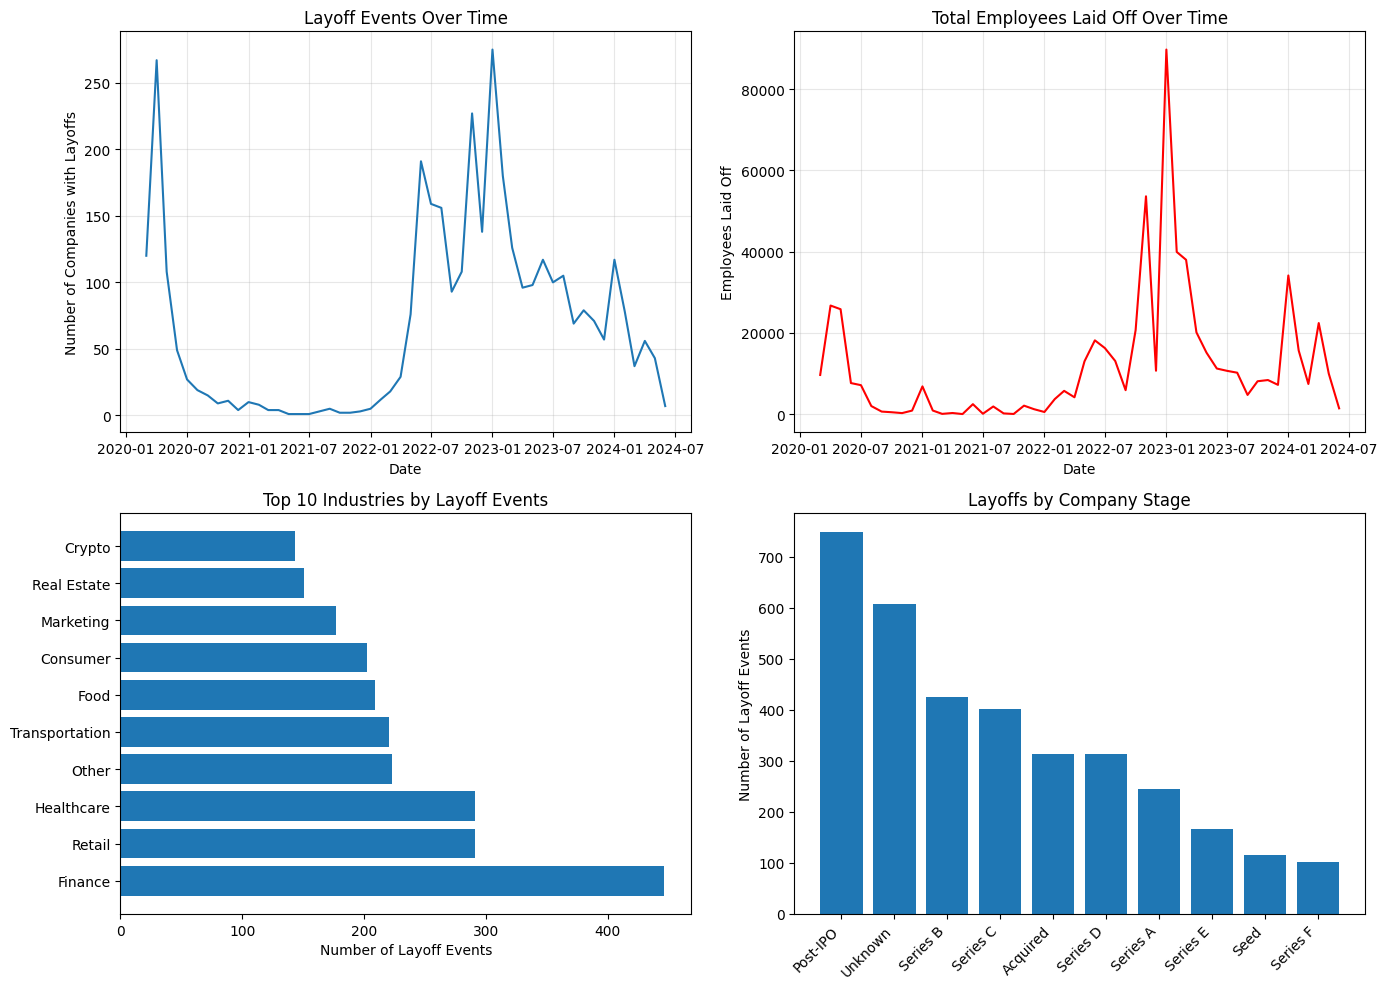

Total unique companies: 2586
Date range: 2020-03-01 00:00:00 to 2024-06-01 00:00:00
Total months: 52
Class imbalance: 0.0    0.973258
1.0    0.026742
Name: Layoff_Event_Binary, dtype: float64


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Layoff events over time
monthly_counts = df_panel.groupby('Date')['Layoff_Event_Binary'].sum()
axes[0, 0].plot(monthly_counts.index, monthly_counts.values)
axes[0, 0].set_title('Layoff Events Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Number of Companies with Layoffs')
axes[0, 0].grid(True, alpha=0.3)

# 2. Total employees laid off over time
monthly_layoffs = df_panel.groupby('Date')['Total_Laid_Off_Sum'].sum()
axes[0, 1].plot(monthly_layoffs.index, monthly_layoffs.values, color='red')
axes[0, 1].set_title('Total Employees Laid Off Over Time')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Employees Laid Off')
axes[0, 1].grid(True, alpha=0.3)

# 3. Top industries with layoffs
industry_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Industry'].value_counts().head(10)
axes[1, 0].barh(range(len(industry_counts)), industry_counts.values)
axes[1, 0].set_yticks(range(len(industry_counts)))
axes[1, 0].set_yticklabels(industry_counts.index)
axes[1, 0].set_title('Top 10 Industries by Layoff Events')
axes[1, 0].set_xlabel('Number of Layoff Events')

# 4. Company stage distribution
stage_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Stage'].value_counts().head(10)
axes[1, 1].bar(range(len(stage_counts)), stage_counts.values)
axes[1, 1].set_xticks(range(len(stage_counts)))
axes[1, 1].set_xticklabels(stage_counts.index, rotation=45, ha='right')
axes[1, 1].set_title('Layoffs by Company Stage')
axes[1, 1].set_ylabel('Number of Layoff Events')

plt.tight_layout()
plt.show()

print(f"Total unique companies: {df_panel['Company'].nunique()}")
print(f"Date range: {df_panel['Date'].min()} to {df_panel['Date'].max()}")
print(f"Total months: {df_panel['Date'].nunique()}")
print(f"Class imbalance: {df_panel['Layoff_Event_Binary'].value_counts(normalize=True)}")

### Analyze Company Coverage in Layoff Data

In [47]:
# Check which companies have the most layoff events
company_layoff_counts = df_panel[df_panel['Layoff_Event_Binary'] == 1].groupby('Company').size().sort_values(ascending=False)

print("Companies with most layoff events:")
print(company_layoff_counts.head(20))
print(f"\nCompanies with 2+ layoff events: {(company_layoff_counts >= 2).sum()}")
print(f"Companies with 3+ layoff events: {(company_layoff_counts >= 3).sum()}")
print(f"Companies with only 1 layoff event: {(company_layoff_counts == 1).sum()}")

# Check public vs private split
stage_dist = df_panel[df_panel['Layoff_Event_Binary'] == 1]['Latest_Stage'].value_counts()
print(f"\nLayoff events by stage:")
print(stage_dist)

Companies with most layoff events:
Company
amazon        9
google        7
rivian        7
microsoft     7
loft          6
expedia       6
gopuff        6
salesforce    6
spotify       6
swiggy        6
unity         6
convoy        6
better.com    6
wework        6
stitch fix    6
peloton       5
ola           5
new relic     5
vroom         5
intel         5
dtype: int64

Companies with 2+ layoff events: 669
Companies with 3+ layoff events: 215
Companies with only 1 layoff event: 1917

Layoff events by stage:
Post-IPO          749
Unknown           608
Series B          426
Series C          401
Acquired          314
Series D          313
Series A          245
Series E          167
Seed              116
Series F          101
Private Equity     63
Series H           33
Series G           22
Subsidiary         21
Series J            9
Series I            8
Name: Latest_Stage, dtype: int64


### Save Cleaned Layoff Panel

In [40]:
df_panel.to_csv('./data/layoffs/layoffs_panel_cleaned.csv', index=False)

print("Saved layoff panel data")
print(f"\nFinal shape: {df_panel.shape}")
print(f"Columns: {df_panel.columns.tolist()}")

Saved layoff panel data

Final shape: (134472, 10)
Columns: ['Company', 'Date', 'Layoff_Event_Count', 'Total_Laid_Off_Sum', 'Avg_Layoff_Percentage', 'Latest_Industry', 'Latest_Country', 'Latest_Stage', 'Latest_Funds_Raised', 'Layoff_Event_Binary']


## Ecomonic data from FRED API

### Collect Economic Data

In [14]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime, timedelta
import numpy as np

# Standard FRED codes
FRED_CODES_FOR_MODEL = {
    'UNRATE': 'unemployment_rate',        # Monthly
    'A191RL1Q225SBEA': 'gdp_growth_rate', # Quarterly (Annualized Real GDP)
    'DFF': 'fed_funds_rate',              # Daily
    'CPIAUCSL': 'cpi',                    # Monthly
    'UMCSENT': 'consumer_confidence',     # Monthly
    'SP500': 'sp500_index',               # Daily
    'ICSA': 'avg_jobless_claims',         # Weekly
}

def collect_and_process_economic_data(start_date_str='2019-01-01', end_date_str='2024-06-01'):
    """
    Collects a single, large time series of economic indicators, calculates change features,
    and converts to a clean monthly DataFrame.
    """
    print("Collecting and processing all economic data in a single pull...")
    
    start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
    end_date = datetime.strptime(end_date_str, '%Y-%m-%d')
    
    try:
        # Fetch all data in one large pull 
        df_raw = pdr.get_data_fred(list(FRED_CODES_FOR_MODEL.keys()), start=start_date, end=end_date)
    except Exception as e:
        print(f"ERROR: Failed to fetch FRED data. {e}")
        return pd.DataFrame()
        
    # --- 1. Resample and Aggregate to Monthly Frequency ---
    
    # Create a monthly index for the target range
    idx = pd.date_range(start_date, end_date, freq='MS')
    df_monthly = pd.DataFrame(index=idx)
    
    # Resample Daily/Weekly/Quarterly data to the monthly index:
    
    # Use the last reported value for Monthly/Quarterly data (UNRATE, CPI, GDP)
    for code in ['UNRATE', 'CPIAUCSL', 'UMCSENT', 'A191RL1Q225SBEA']:
        if code in df_raw.columns:
            df_monthly[FRED_CODES_FOR_MODEL[code]] = df_raw[code].resample('MS').last().fillna(method='ffill')
            
    # Use the average for Daily/Weekly data (FED Funds Rate, Jobless Claims)
    for code in ['DFF', 'ICSA']:
        if code in df_raw.columns:
            df_monthly[FRED_CODES_FOR_MODEL[code]] = df_raw[code].resample('MS').mean().fillna(method='ffill')

    # Use the last value for the S&P 500 Index
    if 'SP500' in df_raw.columns:
        df_monthly[FRED_CODES_FOR_MODEL['SP500']] = df_raw['SP500'].resample('MS').last().fillna(method='ffill')
        
    # --- 2. Calculate Derived Features on the Monthly Data ---
    
    # Calculate Inflation Rate (YoY Change)
    if 'cpi' in df_monthly.columns:
        # Calculate monthly percentage change compared to 12 months ago
        df_monthly['inflation_rate_yoy'] = df_monthly['cpi'].pct_change(periods=12) * 100
        
    # Calculate S&P 500 6-Month Change
    if 'sp500_index' in df_monthly.columns:
        # Calculate percentage change compared to 6 months ago
        df_monthly['sp500_change_6mo'] = df_monthly['sp500_index'].pct_change(periods=6) * 100
        
    # --- 3. Final Cleanup and Formatting ---
    df_final = df_monthly.reset_index().rename(columns={'index': 'Date'})
    df_final = df_final[(df_final['Date'] >= datetime(2020, 1, 1)) & (df_final['Date'] <= datetime(2024, 12, 1))]
    
    print("\nProcessing complete. Features calculated.")
    return df_final

# Run the collection
df_economic = collect_and_process_economic_data()
display(df_economic.head())


Processing complete. Features calculated.


,Date,unemployment_rate,cpi,consumer_confidence,gdp_growth_rate,fed_funds_rate,avg_jobless_claims,sp500_index,inflation_rate_yoy,sp500_change_6mo
12,2020-01-01,3.6,259.127,99.8,-5.2,1.550645,215500.0,3225.52,2.599768,8.225126
13,2020-02-01,3.5,259.250,101.0,-5.2,1.583103,210200.0,2954.22,2.341317,0.948586
14,2020-03-01,4.4,258.076,89.1,-5.2,0.652258,2335250.0,2584.59,1.494040,-13.173808
15,2020-04-01,14.8,256.032,71.8,-28.0,0.049000,4663250.0,2912.43,0.313047,-4.119425
16,2020-05-01,13.2,255.802,72.3,-28.0,0.050000,2173400.0,3044.31,0.198201,-3.077702


### Load and Prepare Economic Data

In [15]:
df_economic['Date'] = pd.to_datetime(df_economic['Date'])

print(f"Economic data shape: {df_economic.shape}")
print(f"Date range: {df_economic['Date'].min()} to {df_economic['Date'].max()}")
print(f"\nColumns: {df_economic.columns.tolist()}")
print(f"\nMissing values:")
print(df_economic.isnull().sum())
print(f"\nSample:")
df_economic.head()

Economic data shape: (54, 10)
Date range: 2020-01-01 00:00:00 to 2024-06-01 00:00:00

Columns: ['Date', 'unemployment_rate', 'cpi', 'consumer_confidence', 'gdp_growth_rate', 'fed_funds_rate', 'avg_jobless_claims', 'sp500_index', 'inflation_rate_yoy', 'sp500_change_6mo']

Missing values:
Date                   0
unemployment_rate      0
cpi                    0
consumer_confidence    0
gdp_growth_rate        0
fed_funds_rate         0
avg_jobless_claims     0
sp500_index            0
inflation_rate_yoy     0
sp500_change_6mo       0
dtype: int64

Sample:


,Date,unemployment_rate,cpi,consumer_confidence,gdp_growth_rate,fed_funds_rate,avg_jobless_claims,sp500_index,inflation_rate_yoy,sp500_change_6mo
12,2020-01-01,3.6,259.127,99.8,-5.2,1.550645,215500.0,3225.52,2.599768,8.225126
13,2020-02-01,3.5,259.250,101.0,-5.2,1.583103,210200.0,2954.22,2.341317,0.948586
14,2020-03-01,4.4,258.076,89.1,-5.2,0.652258,2335250.0,2584.59,1.494040,-13.173808
15,2020-04-01,14.8,256.032,71.8,-28.0,0.049000,4663250.0,2912.43,0.313047,-4.119425
16,2020-05-01,13.2,255.802,72.3,-28.0,0.050000,2173400.0,3044.31,0.198201,-3.077702


### Merge Economic Data with 1-Month Lag

In [16]:
df_panel = pd.read_csv('./data/layoffs/layoffs_panel_cleaned.csv')
df_panel['Date'] = pd.to_datetime(df_panel['Date'])

df_econ_lagged = df_economic.copy()
df_econ_lagged['Date'] = pd.to_datetime(df_econ_lagged['Date']) + pd.DateOffset(months=1)

economic_cols = [
    'Date', 
    'unemployment_rate', 'gdp_growth_rate', 'fed_funds_rate', 
    'cpi', 'consumer_confidence', 'avg_jobless_claims', 
    'inflation_rate_yoy', 'sp500_change_6mo', 'sp500_index' 
]

df_econ_lagged = df_econ_lagged[economic_cols]

print(f"Panel date range: {df_panel['Date'].min()} to {df_panel['Date'].max()}")
print(f"Economic data date range (after lag): {df_econ_lagged['Date'].min()} to {df_econ_lagged['Date'].max()}")

df_merged = df_panel.merge(
    df_econ_lagged,
    on='Date',
    how='left'
)

print(f"\nMissing values before forward fill:")
print(df_merged[economic_cols[1:]].isnull().sum())

df_merged = df_merged.sort_values(['Company', 'Date'])
df_merged[economic_cols[1:]] = df_merged.groupby('Company')[economic_cols[1:]].fillna(method='ffill')

print(f"\nMissing values after forward fill:")
print(df_merged[economic_cols[1:]].isnull().sum())

print(f"\nMerged shape: {df_merged.shape}")

print(f"\nSample merged data for Apple:")
display(df_merged[df_merged['Company'] == 'apple'][['Company', 'Date', 'Layoff_Event_Binary', 'unemployment_rate', 'fed_funds_rate']].head(10))

Panel date range: 2020-03-01 00:00:00 to 2024-06-01 00:00:00
Economic data date range (after lag): 2020-02-01 00:00:00 to 2024-07-01 00:00:00

Missing values before forward fill:
unemployment_rate      0
gdp_growth_rate        0
fed_funds_rate         0
cpi                    0
consumer_confidence    0
avg_jobless_claims     0
inflation_rate_yoy     0
sp500_change_6mo       0
sp500_index            0
dtype: int64

Missing values after forward fill:
unemployment_rate      0
gdp_growth_rate        0
fed_funds_rate         0
cpi                    0
consumer_confidence    0
avg_jobless_claims     0
inflation_rate_yoy     0
sp500_change_6mo       0
sp500_index            0
dtype: int64

Merged shape: (134472, 19)

Sample merged data for Apple:


,Company,Date,Layoff_Event_Binary,unemployment_rate,fed_funds_rate
6188,apple,2020-03-01,0.0,3.5,1.583103
6189,apple,2020-04-01,0.0,4.4,0.652258
6190,apple,2020-05-01,0.0,14.8,0.049000
6191,apple,2020-06-01,0.0,13.2,0.050000
6192,apple,2020-07-01,0.0,11.0,0.077667
6193,apple,2020-08-01,0.0,10.2,0.092581
6194,apple,2020-09-01,0.0,8.4,0.095161
6195,apple,2020-10-01,0.0,7.8,0.090000
6196,apple,2020-11-01,0.0,6.9,0.090000
6197,apple,2020-12-01,0.0,6.7,0.086333


### Save Lagged Economic Data Merge

In [17]:
df_merged.to_csv('data/layoffs_panel_with_lagged_econ.csv', index=False)

print(f"Saved merged data with lagged economic indicators")
print(f"  Shape: {df_merged.shape}")
print(f"  File: data/layoffs_panel_with_lagged_econ.csv")

Saved merged data with lagged economic indicators
  Shape: (134472, 19)
  File: data/layoffs_panel_with_lagged_econ.csv


## SEC data

### Identify Companies Needing SEC Data

In [18]:
# Get Post-IPO companies from layoff panel
post_ipo_companies = df_panel[
    (df_panel['Layoff_Event_Binary'] == 1) & 
    (df_panel['Latest_Stage'] == 'Post-IPO')
]['Company'].unique()

print(f"Post-IPO companies with layoffs: {len(post_ipo_companies)}")
print(f"\nFirst 30 companies:")
for i, company in enumerate(sorted(post_ipo_companies)[:30], 1):
    print(f"{i}. {company}")

# Save to JSON
import json
with open('data/sec/post_ipo_companies.json', 'w') as f:
    json.dump(list(post_ipo_companies), f, indent=2)

print(f"\nSaved to data/sec/post_ipo_companies.json")

Post-IPO companies with layoffs: 441

First 30 companies:
1. 10x genomics
2. 23andme
3. 2u
4. 888
5. 8x8
6. absci
7. absolute software
8. acast
9. accolade
10. acxiom
11. adaptive biotechnologies
12. adobe
13. aeye
14. affirm
15. airbnb
16. akamai
17. akerna
18. akili interactive
19. akili labs
20. allbirds
21. alteryx
22. amazon
23. amdocs
24. amplitude
25. analog devices
26. ancestry
27. appfolio
28. appgate
29. appharvest
30. apple

Saved to data/sec/post_ipo_companies.json


### Get All CIKs from SEC API

In [69]:
import requests

def get_sec_ticker_mapping():
    url = "https://www.sec.gov/files/company_tickers.json"
    response = requests.get(url, headers={'User-Agent': 'student-project@university.edu'})
    if response.status_code == 200:
        return response.json()
    return None

ticker_data = get_sec_ticker_mapping()

sec_lookup = {}
for entry in ticker_data.values():
    company_name = entry['title'].lower()
    cik = str(entry['cik_str']).zfill(10)
    sec_lookup[company_name] = cik

print(f"Loaded {len(sec_lookup)} companies from SEC")
print("\nSample SEC companies:")
for i, (name, cik) in enumerate(list(sec_lookup.items())[:20]):
    print(f"{i+1}. {name}: {cik}")

Loaded 7937 companies from SEC

Sample SEC companies:
1. nvidia corp: 0001045810
2. apple inc.: 0000320193
3. microsoft corp: 0000789019
4. alphabet inc.: 0001652044
5. amazon com inc: 0001018724
6. broadcom inc.: 0001730168
7. meta platforms, inc.: 0001326801
8. tesla, inc.: 0001318605
9. berkshire hathaway inc: 0001067983
10. eli lilly & co: 0000059478
11. jpmorgan chase & co: 0000019617
12. walmart inc.: 0000104169
13. visa inc.: 0001403161
14. oracle corp: 0001341439
15. spdr s&p 500 etf trust: 0000884394
16. exxon mobil corp: 0000034088
17. mastercard inc: 0001141391
18. johnson & johnson: 0000200406
19. netflix inc: 0001065280
20. abbvie inc.: 0001551152


### Match Post-IPO Companies with SEC CIKs

In [70]:
import json

with open('data/sec/post_ipo_companies.json', 'r') as f:
    post_ipo_list = json.load(f)

matched_ciks = {}
unmatched = []

for company in post_ipo_list:
    company_lower = company.lower()
    
    if company_lower in sec_lookup:
        matched_ciks[company] = sec_lookup[company_lower]
    else:
        found = False
        for sec_name, cik in sec_lookup.items():
            if company_lower in sec_name or sec_name in company_lower:
                matched_ciks[company] = cik
                found = True
                break
        if not found:
            unmatched.append(company)

print(f"Total Post-IPO companies: {len(post_ipo_list)}")
print(f"Matched CIKs: {len(matched_ciks)}")
print(f"Unmatched: {len(unmatched)}")

print(f"\nFirst 20 matched:")
for i, (company, cik) in enumerate(list(matched_ciks.items())[:20], 1):
    print(f"{i}. {company}: {cik}")

print(f"\nFirst 20 unmatched:")
for i, company in enumerate(unmatched[:20], 1):
    print(f"{i}. {company}")

with open('data/sec/matched_ciks.json', 'w') as f:
    json.dump(matched_ciks, f, indent=2)

with open('data/sec/unmatched_companies.json', 'w') as f:
    json.dump(unmatched, f, indent=2)

Total Post-IPO companies: 441
Matched CIKs: 270
Unmatched: 171

First 20 matched:
1. 10x genomics: 0001770787
2. 8x8: 0001023731
3. absci: 0001672688
4. adaptive biotechnologies: 0001478320
5. adobe: 0000796343
6. aeye: 0001818644
7. affirm: 0001820953
8. airbnb: 0001559720
9. akamai: 0001086222
10. allbirds: 0001653909
11. amazon: 0001018724
12. amdocs: 0001062579
13. amplitude: 0001866692
14. analog devices: 0000006281
15. appfolio: 0001433195
16. apple: 0000320193
17. applovin: 0001751008
18. aptiv: 0001521332
19. arm holdings: 0001973239
20. asana: 0001477720

First 20 unmatched:
1. 23andme
2. 2u
3. 888
4. absolute software
5. acast
6. accolade
7. acxiom
8. akerna
9. akili interactive
10. akili labs
11. alteryx
12. ancestry
13. appgate
14. appharvest
15. arrival
16. avaya
17. babylon
18. babylon health
19. bally's interactive
20. banxa


### Manual CIK Mapping

In [30]:
import json

manual_cik_map = {
    "23andme": "0001804591",
    "2u": "0001459417",
    "888": None,
    "absolute software": "0001087294",
    "acast": None,
    "accolade": "0001695634",
    "acxiom": "0000733269",
    "akerna": "0001754370",
    "akili interactive": "0001868726",
    "akili labs": "0001868726",
    "alteryx": "0001689923",
    "ancestry": None,
    "appgate": None,
    "appharvest": "0001822523",
    "arrival": "0001826593",
    "avaya": "0001540469",
    "babylon": None,
    "babylon health": None,
    "bally's interactive": "0001747079",
    "banxa": None,
    "berkeley lights": "0001817396",
    "better therapeutics": "0001839518",
    "bigcommerce": "0001836227",
    "bill.com": "0001786013",
    "blue apron": "0001701114",
    "bm technologies": "0001620280",
    "boozt": None,
    "boxed": "0001850871",
    "brightcove": "0001508224",
    "butterfly network copy": "0001822359",
    "casper": "0001809398",
    "castlight health": "0001487541",
    "cazoo": "0001842960",
    "cloudera": "0001535379",
    "contrafect": "0001424657",
    "cue health": "0001830214",
    "cyren": "0001084577",
    "d2l": "0001861449",
    "deepverge": None,
    "deliveroo": None,
    "deliveroo australia": None,
    "delivery hero": None,
    "desktop metal": "0001783745",
    "edgio": "0001130283",
    "embark trucks": "0001839518",
    "eqrx": "0001854647",
    "evbox": None,
    "everbridge": "0001437352",
    "f-secure": None,
    "fisker": "0001720990",
    "frequency therapeutics": "0001683168",
    "funding circle": None,
    "getaround": None,
    "goodfood": None,
    "google": "0001652044",
    "goto group": None,
    "hashicorp": "0001933621",
    "hellofresh": None,
    "hippo insurance": "0001842029",
    "homepoint": "0001831766",
    "homology": "0001691221",
    "ibm": "0000051143",
    "icad": "0001048371",
    "innovid": "0001781674",
    "instacart": "0001783256",
    "invitae": "0001501134",
    "ironnet": "0001836908",
    "jd.id": None,
    "juniper networks": "0001043604",
    "kape": None,
    "kape technologies": None,
    "kaspien": "0001282224",
    "kinaxis": "0001577637",
    "kleos space": None,
    "kogan": None,
    "laybuy": None,
    "leafly": "0001849820",
    "lending club": "0001409970",
    "lenovo": None,
    "livetiles": None,
    "livevox": "0001816431",
    "lordstown motors": "0001759546",
    "lucid motors": "0001811210",
    "lucira health": "0001824920",
    "mariadb": "0001922334",
    "markforged": "0001857363",
    "matterport": "0001789029",
    "maven": None,
    "megaport": None,
    "mindbody": "0001575965",
    "missfresh": "0001858681",
    "mode global": "0001818502",
    "momentive": "0001739936",
    "n-able technologies": "0001861621",
    "nanostring": "0001411690",
    "nanostring technologies": "0001411690",
    "national instruments": "0000935494",
    "ncc group": None,
    "ncsoft": None,
    "nearmap": None,
    "neoleukin therapeutics": "0001759613",
    "nevro": "0001421448",
    "new relic": "0001448056",
    "new work se": None,
    "nubank": "0001853227",
    "ondeck": "0001420811",
    "openpay": None,
    "opentext": "0001032210",
    "otonomo": "0001828244",
    "otovo": None,
    "outbrain": "0001846046",
    "pagbank": None,
    "pear therapeutics": "0001818746",
    "propertyguru": "0001922865",
    "proterra": "0001802457",
    "qualtrics": "0001939947",
    "quanergy systems": "0001839489",
    "quantum si": "0001830214",
    "redbubble": None,
    "redfin": "0001382821",
    "root insurance": "0001788882",
    "rubicon project": "0001355067",
    "rubicon technologies": "0001824794",
    "rubius": "0001701835",
    "sage therapeutics": "0001556593",
    "sage therapeutics copy": "0001556593",
    "samsung": None,
    "sarcos": "0001839489",
    "science 37": "0001844437",
    "secureworks": "0001657280",
    "selina": "0001860871",
    "sema4": "0001822359",
    "sensetime": None,
    "shutterfly": "0001125920",
    "sinch": None,
    "singular genomics": "0001848416",
    "siriusxm": "0000908937",
    "smartsheet": "0001725579",
    "smiledirectclub": "0001775625",
    "software ag": None,
    "sono motors": None,
    "splunk": "0001353283",
    "sqz biotech": "0001760689",
    "storytel": None,
    "superloop": None,
    "take-two": "0000946581",
    "take-two interactive": "0000946581",
    "talis biomedical": "0001821966",
    "tcr2": "0001577629",
    "telenav": "0001365159",
    "tempo automation": None,
    "the realreal": "0001780020",
    "thinkific": "0001880981",
    "thoughtworks": "0001895987",
    "titan medical": "0001519113",
    "tomtom": None,
    "tricida": "0001698530",
    "twitter": "0001418091",
    "vacasa": "0001856456",
    "verticalscope": None,
    "vista group": None,
    "walkme": "0001908658",
    "wejo": "0001842004",
    "westwing": None,
    "wework": "0001533523",
    "whispir": None,
    "wish": "0001822250",
    "xiaomi": None,
    "zalando": None,
    "zuora": "0001701732",
    "zymergen": "0001830214"
}

with open('data/sec/manual_cik_mappings.json', 'w') as f:
    json.dump(manual_cik_map, f, indent=2)

print(f"Saved complete manual CIK mappings to data/sec/manual_cik_mappings.json")
print(f"Total: {len(manual_cik_map)} companies")
print(f"With CIK: {sum(1 for v in manual_cik_map.values() if v)}")
print(f"No CIK: {sum(1 for v in manual_cik_map.values() if not v)}")

Saved complete manual CIK mappings to data/sec/manual_cik_mappings.json
Total: 171 companies
With CIK: 119
No CIK: 52


### SEC Data Collection Functions

In [71]:
import requests
import time

headers = {'User-Agent': 'student-project@university.edu'}

def get_company_facts(cik):
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    response = requests.get(url, headers=headers)
    time.sleep(0.12)
    if response.status_code == 200:
        return response.json()
    return None

def extract_financials(facts_data, company_name):
    if not facts_data:
        return []
    
    records = []
    us_gaap = facts_data.get('facts', {}).get('us-gaap', {})
    
    metrics = {
        'Revenues': 'revenue',
        'CostOfRevenue': 'cost_of_revenue',
        'NetIncomeLoss': 'net_income',
        'OperatingExpenses': 'operating_expenses',
        'OperatingIncomeLoss': 'operating_income',
        'ResearchAndDevelopmentExpense': 'rd_expense',
        'Cash': 'cash',
        'Assets': 'total_assets',
        'Liabilities': 'total_liabilities',
        'StockholdersEquity': 'stockholders_equity',
        'GrossProfit': 'gross_profit',
        'AssetsCurrent': 'current_assets',
        'LiabilitiesCurrent': 'current_liabilities',
        'RetainedEarningsAccumulatedDeficit': 'retained_earnings'
    }
    
    for gaap_name, col_name in metrics.items():
        if gaap_name in us_gaap:
            units = us_gaap[gaap_name].get('units', {}).get('USD', [])
            for item in units:
                if item.get('form') in ['10-K', '10-Q']:
                    records.append({
                        'company': company_name,
                        'date': item['end'],
                        'metric': col_name,
                        'value': item['val'],
                        'form': item['form'],
                        'fiscal_year': item.get('fy'),
                        'fiscal_period': item.get('fp')
                    })
    
    return records

print("Collection functions ready")

Collection functions ready


### Collect SEC Data - All Post-IPO Companies

In [72]:
import pandas as pd
import requests
import time
import glob
import os

headers = {'User-Agent': 'li.xiaohua@northeastern.edu'}

def get_company_facts(cik, timeout=15):
    url = f"https://data.sec.gov/api/xbrl/companyfacts/CIK{cik}.json"
    try:
        response = requests.get(url, headers=headers, timeout=timeout)
        time.sleep(0.12)
        if response.status_code == 200:
            return response.json()
    except requests.exceptions.Timeout:
        print("TIMEOUT", end=" ")
        return None
    except Exception as e:
        print(f"ERROR: {type(e).__name__}", end=" ")
        return None
    return None

checkpoint_files = glob.glob('data/sec/sec_checkpoint_*.csv')
if checkpoint_files:
    latest_checkpoint = max(checkpoint_files, key=lambda x: int(x.split('_')[-1].split('.')[0]))
    df_existing = pd.read_csv(latest_checkpoint)
    all_records = df_existing.to_dict('records')
    companies_done = set(df_existing['company'].unique())
    print(f"Resuming from checkpoint: {latest_checkpoint}")
    print(f"Already collected: {len(companies_done)} companies, {len(all_records)} records")
else:
    all_records = []
    companies_done = set()
    print("Starting fresh collection")


with open('data/sec/matched_ciks.json', 'r') as f:
    matched_ciks = json.load(f)

with open('data/sec/manual_cik_mappings.json', 'r') as f:
    manual_ciks = json.load(f)

combined_ciks = {**matched_ciks}
for company, cik in manual_ciks.items():
    if cik and company not in combined_ciks:
        combined_ciks[company] = cik

failed = []
companies_to_collect = [(c, cik) for c, cik in combined_ciks.items() if c not in companies_done]

print(f"Remaining to collect: {len(companies_to_collect)}")
print(f"Total progress: {len(companies_done)}/{len(combined_ciks)}\n")

for idx, (company, cik) in enumerate(companies_to_collect, 1):
    current_total = len(companies_done) + idx
    print(f"[{current_total}/{len(combined_ciks)}] {company}...", end=" ")

    facts = get_company_facts(cik)
    if facts:
        records = extract_financials(facts, company)
        all_records.extend(records)
        print(f"{len(records)} records")
    else:
        print("FAILED")
        failed.append(company)
    
    if current_total % 50 == 0:
        df_checkpoint = pd.DataFrame(all_records)
        df_checkpoint.to_csv(f'data/sec/sec_checkpoint_{current_total}.csv', index=False)
        print(f"  Checkpoint saved at {current_total} companies")

df_final = pd.DataFrame(all_records)
df_final.to_csv('data/sec/sec_all_postipo_collected.csv', index=False)

print(f"\nCompleted!")
print(f"Total records: {len(df_final)}")
print(f"Total companies: {df_final['company'].nunique()}")
print(f"Failed this run: {len(failed)}")

Starting fresh collection
Remaining to collect: 389
Total progress: 0/389

[1/389] 10x genomics... 879 records
[2/389] 8x8... 2025 records
[3/389] absci... 573 records
[4/389] adaptive biotechnologies... 592 records
[5/389] adobe... 2468 records
[6/389] aeye... 649 records
[7/389] affirm... 455 records
[8/389] airbnb... 558 records
[9/389] akamai... 2091 records
[10/389] allbirds... 524 records
[11/389] amazon... 1488 records
[12/389] amdocs... 0 records
[13/389] amplitude... 518 records
[14/389] analog devices... 2120 records
[15/389] appfolio... 1070 records
[16/389] apple... 2164 records
[17/389] applovin... 588 records
[18/389] aptiv... 1442 records
[19/389] arm holdings... 0 records
[20/389] asana... 625 records
[21/389] astra... 0 records
[22/389] atlassian... 421 records
[23/389] audiocodes... 0 records
[24/389] aurora... 498 records
[25/389] autodesk... 2398 records
[26/389] bakkt... 432 records
[27/389] bark... 572 records
[28/389] beyond meat... 929 records
[29/389] bigbear.a

### Review Collection Results

In [74]:
df_sec_collected = pd.read_csv('data/sec/sec_all_postipo_collected.csv')

print(f"Total records: {len(df_sec_collected)}")
print(f"Companies collected: {df_sec_collected['company'].nunique()}")
print(f"Metrics: {df_sec_collected['metric'].unique()}")
print(f"Date range: {df_sec_collected['date'].min()} to {df_sec_collected['date'].max()}")

print(f"\nRecords per company (top 10):")
print(df_sec_collected['company'].value_counts().head(10))

print(f"\nFailed companies: {failed}")

print(f"\nSummary:")
print(f"- Matched CIKs: {len(combined_ciks)}")
print(f"- Successfully collected: {df_sec_collected['company'].nunique()}")
print(f"- Failed: {len(failed)}")
print(f"- Missing: {len(combined_ciks) - df_sec_collected['company'].nunique() - len(failed)}")

Total records: 296358
Companies collected: 296
Metrics: ['revenue' 'cost_of_revenue' 'net_income' 'operating_expenses'
 'operating_income' 'total_assets' 'total_liabilities'
 'stockholders_equity' 'gross_profit' 'current_assets'
 'current_liabilities' 'retained_earnings' 'rd_expense' 'cash']
Date range: 2006-09-24 to 2025-10-25

Records per company (top 10):
blackbaud           2559
adobe               2468
salesforce          2460
autodesk            2398
netflix             2354
ebay                2333
juniper networks    2323
digimarc            2318
electronic arts     2269
tesla               2267
Name: company, dtype: int64

Failed companies: ['bukalapak', 'doma', 'legible', 'accolade', 'akerna', 'arrival', 'avaya', 'berkeley lights', 'better therapeutics', 'bigcommerce', 'bill.com', 'boxed', 'brightcove', 'casper', 'castlight health', 'cazoo', 'desktop metal', 'edgio', 'embark trucks', 'eqrx', 'frequency therapeutics', 'hashicorp', 'hippo insurance', 'homepoint', 'icad', 'innov

### Transform SEC Data to Wide Format

In [75]:
df_sec_long = pd.read_csv('data/sec/sec_all_postipo_collected.csv')
df_sec_long['date'] = pd.to_datetime(df_sec_long['date'])

df_sec_wide = df_sec_long.pivot_table(
    index=['company', 'date', 'fiscal_year', 'fiscal_period', 'form'],
    columns='metric',
    values='value',
    aggfunc='first'
).reset_index()

df_sec_wide = df_sec_wide.sort_values(['company', 'date'])

print(f"Wide format shape: {df_sec_wide.shape}")
print(f"\nColumns: {df_sec_wide.columns.tolist()}")
print(f"\nMissing values:")
print(df_sec_wide.isnull().sum())
print(f"\nSample data:")
df_sec_wide[df_sec_wide['company'] == 'apple'].head()

Wide format shape: (46122, 19)

Columns: ['company', 'date', 'fiscal_year', 'fiscal_period', 'form', 'cash', 'cost_of_revenue', 'current_assets', 'current_liabilities', 'gross_profit', 'net_income', 'operating_expenses', 'operating_income', 'rd_expense', 'retained_earnings', 'revenue', 'stockholders_equity', 'total_assets', 'total_liabilities']

Missing values:
metric
company                    0
date                       0
fiscal_year                0
fiscal_period              0
form                       0
cash                   43976
cost_of_revenue        37329
current_assets         27339
current_liabilities    27321
gross_profit           30855
net_income             18230
operating_expenses     32162
operating_income       23388
rd_expense             29835
retained_earnings      26113
revenue                37944
stockholders_equity     9984
total_assets           25721
total_liabilities      28699
dtype: int64

Sample data:


metric,company,date,fiscal_year,fiscal_period,form,cash,cost_of_revenue,current_assets,current_liabilities,gross_profit,net_income,operating_expenses,operating_income,rd_expense,retained_earnings,revenue,stockholders_equity,total_assets,total_liabilities
3854,apple,2006-09-30,2009,FY,10-K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.984000e+09,NaN,NaN
3855,apple,2007-09-29,2009,FY,10-K,NaN,NaN,NaN,NaN,8.154000e+09,3.496000e+09,3.745000e+09,4.409000e+09,7.820000e+08,NaN,NaN,1.453200e+10,NaN,NaN
3856,apple,2007-09-29,2010,FY,10-K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.453100e+10,NaN,NaN
3857,apple,2008-06-28,2009,Q3,10-Q,NaN,NaN,NaN,NaN,8.406000e+09,3.698000e+09,3.573000e+09,4.833000e+09,8.110000e+08,NaN,NaN,NaN,NaN,NaN
3858,apple,2008-09-27,2009,FY,10-K,NaN,NaN,3.231100e+10,1.409200e+10,1.114500e+10,4.834000e+09,4.870000e+09,6.275000e+09,1.109000e+09,1.384500e+10,NaN,2.103000e+10,3.957200e+10,1.854200e+10


### Save SEC Wide Format

In [88]:
df_sec_wide.to_csv('data/sec/sec_wide_format.csv', index=False)
print(f"Saved SEC wide format: {df_sec_wide.shape}")

Saved SEC wide format: (46122, 19)


### Prepare SEC Data for Merging with Layoff Panel

In [89]:
df_sec_monthly = df_sec_wide.copy()
df_sec_monthly['Date'] = pd.to_datetime(df_sec_monthly['date']).dt.to_period('M').dt.to_timestamp()

df_sec_monthly = df_sec_monthly.sort_values(['company', 'Date'])

print(f"SEC monthly shape: {df_sec_monthly.shape}")
print(f"Date range: {df_sec_monthly['Date'].min()} to {df_sec_monthly['Date'].max()}")
print(f"\nSample:")
df_sec_monthly[df_sec_monthly['company'] == 'amazon'][['company', 'Date', 'revenue', 'net_income']].head()

SEC monthly shape: (46122, 20)
Date range: 2006-09-01 00:00:00 to 2025-10-01 00:00:00

Sample:


metric,company,Date,revenue,net_income
2877,amazon,2006-12-01,NaN,NaN
2878,amazon,2007-12-01,NaN,476000000.0
2879,amazon,2007-12-01,NaN,NaN
2880,amazon,2008-06-01,NaN,588000000.0
2881,amazon,2008-09-01,NaN,627000000.0


### Analyze SEC Data Duplicates

In [90]:
duplicates = df_sec_monthly[df_sec_monthly.duplicated(['company', 'Date'], keep=False)]
duplicates_sample = duplicates[duplicates['company'] == 'amazon'].sort_values(['Date', 'date'])

print(f"Total duplicate company-months: {duplicates.groupby(['company', 'Date']).ngroups}")
print(f"\nSample duplicates for Amazon:")
print(duplicates_sample[['company', 'Date', 'date', 'form', 'fiscal_period', 'revenue', 'net_income']].head(20))

print(f"\nForms distribution in duplicates:")
print(duplicates['form'].value_counts())

Total duplicate company-months: 10531

Sample duplicates for Amazon:
metric company       Date       date  form fiscal_period  revenue   net_income
2878    amazon 2007-12-01 2007-12-31  10-K            FY      NaN  476000000.0
2879    amazon 2007-12-01 2007-12-31  10-K            FY      NaN          NaN
2882    amazon 2008-12-01 2008-12-31  10-K            FY      NaN  645000000.0
2883    amazon 2008-12-01 2008-12-31  10-Q            Q2      NaN          NaN
2884    amazon 2008-12-01 2008-12-31  10-Q            Q3      NaN          NaN
2885    amazon 2008-12-01 2008-12-31  10-K            FY      NaN  645000000.0
2886    amazon 2008-12-01 2008-12-31  10-K            FY      NaN          NaN
2887    amazon 2009-03-01 2009-03-31  10-K            FY      NaN  177000000.0
2888    amazon 2009-03-01 2009-03-31  10-Q            Q1      NaN  679000000.0
2889    amazon 2009-06-01 2009-06-30  10-Q            Q2      NaN  663000000.0
2890    amazon 2009-06-01 2009-06-30  10-K            FY      

### Deduplicate - Keep Record with Most Non-Null Financial Metrics

In [100]:
sec_features = ['revenue', 'net_income', 'total_assets', 'cash', 'operating_income', 
                'rd_expense', 'cost_of_revenue', 'gross_profit', 'operating_expenses',
                'stockholders_equity', 'total_liabilities', 'current_assets', 
                'current_liabilities', 'retained_earnings']

df_sec_dedup = df_sec_monthly.copy()

# Count non-null financial metrics for each record
df_sec_dedup['non_null_count'] = df_sec_dedup[sec_features].notna().sum(axis=1)

# Sort by company, Date, non_null_count (descending), then date (descending)
df_sec_dedup = df_sec_dedup.sort_values(
    ['company', 'Date', 'non_null_count', 'date'],
    ascending=[True, True, False, False]
)

# Keep first (most complete) per company-month
df_sec_dedup = df_sec_dedup.groupby(['company', 'Date']).first().reset_index()

print(f"Before dedup: {len(df_sec_monthly)} records")
print(f"After dedup: {len(df_sec_dedup)} records")
print(f"Removed: {len(df_sec_monthly) - len(df_sec_dedup)} records")

print("\n10x genomics 2018-09-01:")
test = df_sec_dedup[(df_sec_dedup['company'] == '10x genomics') & 
                     (df_sec_dedup['Date'] == '2018-09-01')]
display(test[['company', 'Date', 'fiscal_year', 'fiscal_period', 'revenue', 'net_income', 'non_null_count']])

print("\n10x genomics 2018-12-01:")
test2 = df_sec_dedup[(df_sec_dedup['company'] == '10x genomics') & 
                      (df_sec_dedup['Date'] == '2018-12-01')]
display(test2[['company', 'Date', 'fiscal_year', 'fiscal_period', 'revenue', 'net_income', 'non_null_count']])

Before dedup: 46122 records
After dedup: 11826 records
Removed: 34296 records

10x genomics 2018-09-01:


metric,company,Date,fiscal_year,fiscal_period,revenue,net_income,non_null_count
4,10x genomics,2018-09-01,2019,Q3,95759000.0,-36961000.0,7



10x genomics 2018-12-01:


metric,company,Date,fiscal_year,fiscal_period,revenue,net_income,non_null_count
5,10x genomics,2018-12-01,2019,FY,146313000.0,-112485000.0,12


### Save Deduplicated SEC Data

In [101]:
df_sec_dedup = df_sec_dedup.drop('non_null_count', axis=1)
df_sec_dedup.to_csv('data/sec/sec_dedup.csv', index=False)

print(f"Saved deduplicated SEC data: {df_sec_dedup.shape}")
print(f"Companies: {df_sec_dedup['company'].nunique()}")
print(f"Date range: {df_sec_dedup['Date'].min()} to {df_sec_dedup['Date'].max()}")

Saved deduplicated SEC data: (11826, 20)
Companies: 296
Date range: 2006-09-01 00:00:00 to 2025-10-01 00:00:00


### Filter Companies with Sufficient SEC Data Coverage

In [165]:
df_sec_dedup = pd.read_csv('data/sec/sec_dedup.csv')
df_sec_dedup['Date'] = pd.to_datetime(df_sec_dedup['Date'])

# Define study period
study_start = pd.to_datetime('2020-03-01')
study_end = pd.to_datetime('2024-06-01')

# Filter to study period
df_sec_study = df_sec_dedup[(df_sec_dedup['Date'] >= study_start) & (df_sec_dedup['Date'] <= study_end)]

# Calculate expected quarters in study period
months_in_study = (study_end.year - study_start.year) * 12 + (study_end.month - study_start.month)
expected_quarters = months_in_study / 3
print(f"Study period: {study_start.date()} to {study_end.date()}")
print(f"Expected quarterly reports: ~{expected_quarters:.0f}")

# Count actual reports per company
company_report_counts = df_sec_study.groupby('company').size().reset_index(name='report_count')

# Calculate coverage percentage
company_report_counts['coverage_pct'] = (company_report_counts['report_count'] / expected_quarters) * 100

# Filter: Keep companies with >= 50% coverage
threshold_pct = 50
companies_sufficient_data = company_report_counts[company_report_counts['coverage_pct'] >= threshold_pct]

print(f"\nCoverage threshold: {threshold_pct}%")
print(f"Companies with sufficient data: {len(companies_sufficient_data)}")
print(f"Companies dropped: {len(company_report_counts) - len(companies_sufficient_data)}")

print(f"\nTop 20 companies by coverage:")
display(companies_sufficient_data.sort_values('coverage_pct', ascending=False)[['company', 'report_count', 'coverage_pct']].head(20))

print(f"\nCompanies with insufficient data (sample):")
display(company_report_counts[company_report_counts['coverage_pct'] < threshold_pct][['company', 'report_count', 'coverage_pct']].head(10))

# Save filtered company list
companies_to_keep = companies_sufficient_data['company'].tolist()

with open('data/sec/companies_sufficient_coverage.json', 'w') as f:
    json.dump(companies_to_keep, f, indent=2)

print(f"\nSaved {len(companies_to_keep)} companies to: data/sec/companies_sufficient_coverage.json")

Study period: 2020-03-01 to 2024-06-01
Expected quarterly reports: ~17

Coverage threshold: 50%
Companies with sufficient data: 288
Companies dropped: 6

Top 20 companies by coverage:


,company,report_count,coverage_pct
195,presto,27,158.823529
143,lucid motors,20,117.647059
251,tesla,20,117.647059
203,redfin,19,111.764706
35,bird,19,111.764706
95,evgo,19,111.764706
31,bark,19,111.764706
236,springbig,19,111.764706
230,sofi,19,111.764706
102,fubotv,19,111.764706



Companies with insufficient data (sample):


,company,report_count,coverage_pct
56,cloudera,6,35.294118
88,enjoy,1,5.882353
177,ondeck,2,11.764706
183,pagaya,8,47.058824
223,shopify,5,29.411765
227,smartsheet,4,23.529412



Saved 288 companies to: data/sec/companies_sufficient_coverage.json


### Merging SEC Data with Time-Aware Lagging

In [19]:
import json

# Load companies with sufficient coverage
with open('data/sec/companies_sufficient_coverage.json', 'r') as f:
    companies_to_keep = json.load(f)

print(f"Companies with ≥50% SEC coverage: {len(companies_to_keep)}")

# Reload data
df_merged = pd.read_csv('data/layoffs_panel_with_lagged_econ.csv')
df_merged['Date'] = pd.to_datetime(df_merged['Date'])

df_sec_dedup = pd.read_csv('data/sec/sec_dedup.csv')
df_sec_dedup['Date'] = pd.to_datetime(df_sec_dedup['Date'])
df_sec_dedup['filing_date'] = pd.to_datetime(df_sec_dedup['date'])

# Filter SEC data to companies with sufficient coverage
df_sec_dedup = df_sec_dedup[df_sec_dedup['company'].isin(companies_to_keep)]

print(f"SEC data loaded (filtered): {df_sec_dedup.shape}")
print(f"Companies: {df_sec_dedup['company'].nunique()}")

sec_features = ['cash', 'cost_of_revenue', 'gross_profit', 'net_income', 'operating_expenses', 
                'operating_income', 'rd_expense', 'revenue', 'stockholders_equity', 'total_assets', 
                'total_liabilities', 'current_assets', 'current_liabilities', 'retained_earnings']

# Prepare for merge
df_merged['Date'] = pd.to_datetime(df_merged['Date'])
df_merged_sorted = df_merged.sort_values(['Company', 'Date']).reset_index(drop=True)

# Create lowercase company column for matching
df_merged_sorted['company'] = df_merged_sorted['Company'].str.lower()

df_sec_sorted = df_sec_dedup[['company', 'filing_date', 'fiscal_year', 'fiscal_period', 'form'] + sec_features].sort_values(['company', 'filing_date']).reset_index(drop=True)

print(f"\nMerging...")
print(f"Left shape: {df_merged_sorted.shape}")
print(f"Right shape: {df_sec_sorted.shape}")

def merge_company_data(group):
    company_name = group.name
    sec_company_data = df_sec_sorted[df_sec_sorted['company'] == company_name]
    
    if len(sec_company_data) == 0:
        return group
    
    result = pd.merge_asof(
        left=group.sort_values('Date'),
        right=sec_company_data.sort_values('filing_date'),
        left_on='Date',
        right_on='filing_date',
        direction='backward',
        suffixes=('', '_sec')
    )
    return result

df_merged_sec = df_merged_sorted.groupby('company', group_keys=False).apply(merge_company_data)

# Clean up
df_merged_sec = df_merged_sec.drop(['company', 'filing_date'], axis=1, errors='ignore')

print(f"\nAfter merge: {df_merged_sec.shape}")

print("\nAmazon check:")
amazon_check = df_merged_sec[df_merged_sec['Company'] == 'amazon']
print(f"  Rows: {len(amazon_check)}")
print(f"  Rows with operating_income: {amazon_check['operating_income'].notna().sum()}")
display(amazon_check[['Company', 'Date', 'Layoff_Event_Binary', 'fiscal_period', 'operating_income', 'net_income']].tail(15))

Companies with ≥50% SEC coverage: 288
SEC data loaded (filtered): (11685, 21)
Companies: 288

Merging...
Left shape: (134472, 20)
Right shape: (11685, 19)

After merge: (134472, 37)

Amazon check:
  Rows: 52
  Rows with operating_income: 52


,Company,Date,Layoff_Event_Binary,fiscal_period,operating_income,net_income
37,amazon,2023-04-01,0.0,Q1,4.774000e+09,4.294000e+09
38,amazon,2023-05-01,0.0,Q1,4.774000e+09,4.294000e+09
39,amazon,2023-06-01,0.0,Q1,4.774000e+09,4.294000e+09
40,amazon,2023-07-01,1.0,Q2,1.245500e+10,1.307200e+10
41,amazon,2023-08-01,0.0,Q2,1.245500e+10,1.307200e+10
42,amazon,2023-09-01,0.0,Q2,1.245500e+10,1.307200e+10
43,amazon,2023-10-01,0.0,Q3,2.364300e+10,2.007900e+10
44,amazon,2023-11-01,1.0,Q3,2.364300e+10,2.007900e+10
45,amazon,2023-12-01,0.0,Q3,2.364300e+10,2.007900e+10
46,amazon,2024-01-01,1.0,FY,3.685200e+10,3.042500e+10


### Identify Companies with SEC Data (Any SEC Metrics)

In [20]:
# Company has SEC data if ANY SEC feature is not null for that company
companies_with_sec = df_merged_sec.groupby('Company')[sec_features].apply(
    lambda x: x.notna().any().any()
)

companies_with_sec = companies_with_sec[companies_with_sec].index.tolist()

print(f"Companies with SEC data: {len(companies_with_sec)}")
print(f"\nCompanies list:")
print(sorted(companies_with_sec))

df_final = df_merged_sec[df_merged_sec['Company'].isin(companies_with_sec)].copy()

print(f"\nFiltered dataset:")
print(f"  Shape: {df_final.shape}")
print(f"  Companies: {df_final['Company'].nunique()}")
print(f"  Layoff events: {df_final['Layoff_Event_Binary'].sum():.0f}")
print(f"  Class balance: {df_final['Layoff_Event_Binary'].mean():.4f}")

print(f"\nSEC coverage in filtered dataset:")
for col in sec_features:
    coverage = df_final[col].notna().sum()
    pct = coverage / len(df_final) * 100
    print(f"  {col}: {coverage} ({pct:.1f}%)")

Companies with SEC data: 288

Companies list:
['10x genomics', '23andme', '2u', '8x8', 'absci', 'absolute software', 'acxiom', 'adaptive biotechnologies', 'adobe', 'aeye', 'affirm', 'airbnb', 'akamai', 'akili interactive', 'akili labs', 'allbirds', 'alteryx', 'amazon', 'amplitude', 'analog devices', 'appfolio', 'appharvest', 'apple', 'applovin', 'aptiv', 'asana', 'atlassian', 'aurora', 'autodesk', 'bakkt', "bally's interactive", 'bark', 'beyond meat', 'bigbear.ai', 'biomarin', 'bird', 'blackbaud', 'blackline', 'blend', 'block', 'blue apron', 'bm technologies', 'bumble', 'butterfly network', 'butterfly network copy', 'buzzfeed', 'canoo', 'capital one', 'cardlytics', 'cargurus', 'carvana', 'century therapeutics', 'chegg', 'chewy', 'cimpress', 'cisco', 'cloudflare', 'codexis', 'coherent', 'coinbase', 'compass', 'confluent', 'contrafect', 'core scientific', 'coursera', 'criteo', 'cs disco', 'cue', 'cue health', 'cyren', 'd2l', 'definitive healthcare', 'dell', 'dhi group', 'digimarc', 'digi

### Save Final Merged Dataset with SEC Data

In [21]:
df_final.to_csv('data/layoffs_panel_final.csv', index=False)

print(f"Saved final dataset: {df_final.shape}")
print(f"File: data/layoffs_panel_final.csv")

Saved final dataset: (14976, 37)
File: data/layoffs_panel_final.csv


### Final Data Summary

In [22]:
print(f"\nDataset Shape: {df_final.shape}")
print(f"  Company-months: {len(df_final)}")
print(f"  Features: {len(df_final.columns)}")

print(f"\nCompanies: {df_final['Company'].nunique()}")
print(f"Date Range: {df_final['Date'].min()} to {df_final['Date'].max()}")
print(f"Time Period: {df_final['Date'].nunique()} months")

print(f"\nTarget Variable (Layoff_Event_Binary):")
print(df_final['Layoff_Event_Binary'].value_counts())
print(f"  Class balance: {df_final['Layoff_Event_Binary'].mean():.4f} (positive class)")

print(f"\nTop 15 Companies by Layoff Events:")
layoff_by_company = df_final[df_final['Layoff_Event_Binary'] == 1].groupby('Company').size().sort_values(ascending=False)
print(layoff_by_company.head(15))

print(f"\nMissing Values Summary:")
missing = df_final.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
for col, count in missing.items():
    pct = count / len(df_final) * 100
    print(f"  {col}: {count} ({pct:.1f}%)")


Dataset Shape: (14976, 37)
  Company-months: 14976
  Features: 37

Companies: 288
Date Range: 2020-03-01 00:00:00 to 2024-06-01 00:00:00
Time Period: 52 months

Target Variable (Layoff_Event_Binary):
0.0    14423
1.0      553
Name: Layoff_Event_Binary, dtype: int64
  Class balance: 0.0369 (positive class)

Top 15 Companies by Layoff Events:
Company
amazon        9
google        7
microsoft     7
rivian        7
salesforce    6
unity         6
expedia       6
stitch fix    6
zymergen      5
peloton       5
blend         5
intel         5
vroom         5
new relic     5
meta          4
dtype: int64

Missing Values Summary:
  cash: 13351 (89.1%)
  revenue: 11447 (76.4%)
  cost_of_revenue: 9454 (63.1%)
  gross_profit: 6516 (43.5%)
  operating_expenses: 6032 (40.3%)
  rd_expense: 4312 (28.8%)
  total_liabilities: 2746 (18.3%)
  current_assets: 2263 (15.1%)
  current_liabilities: 2253 (15.0%)
  retained_earnings: 1520 (10.1%)
  operating_income: 1501 (10.0%)
  total_assets: 1414 (9.4%)
  ne

## (Unused) Financial Modeling Prep (FMP) API

### Create Company to Ticker Mapping

In [144]:
import json

with open('data/sec/companies_sufficient_coverage.json', 'r') as f:
    companies_sufficient = json.load(f)

ticker_map_full = {
    "10x genomics": "TXG",
    "23andme": "ME",
    "2u": "TWOU",
    "8x8": "EGHT",
    "absci": "ABSI",
    "absolute software": "ABST",
    "acxiom": None,
    "adaptive biotechnologies": "ADPT",
    "adobe": "ADBE",
    "aeye": "LIDR",
    "affirm": "AFRM",
    "airbnb": "ABNB",
    "akamai": "AKAM",
    "akili interactive": "AKLI",
    "akili labs": "AKLI",
    "allbirds": "BIRD",
    "alteryx": "AYX",
    "amazon": "AMZN",
    "amplitude": "AMPL",
    "analog devices": "ADI",
    "appfolio": "APPF",
    "appharvest": "APPH",
    "apple": "AAPL",
    "applovin": "APP",
    "aptiv": "APTV",
    "asana": "ASAN",
    "atlassian": "TEAM",
    "aurora": "AUR",
    "autodesk": "ADSK",
    "bakkt": "BKKT",
    "bally's interactive": "BALY",
    "bark": "BARK",
    "beyond meat": "BYND",
    "bigbear.ai": "BBAI",
    "biomarin": "BMRN",
    "bird": "BRDS",
    "blackbaud": "BLKB",
    "blackline": "BL",
    "blend": "BLND",
    "block": "SQ",
    "blue apron": "APRN",
    "bm technologies": "BMTX",
    "bumble": "BMBL",
    "butterfly network": "BFLY",
    "butterfly network copy": "BFLY",
    "buzzfeed": "BZFD",
    "canoo": "GOEV",
    "capital one": "COF",
    "cardlytics": "CDLX",
    "cargurus": "CARG",
    "carvana": "CVNA",
    "century therapeutics": "IPSC",
    "chegg": "CHGG",
    "chewy": "CHWY",
    "cimpress": "CMPR",
    "cisco": "CSCO",
    "cloudflare": "NET",
    "codexis": "CDXS",
    "coherent": "COHR",
    "coinbase": "COIN",
    "compass": "COMP",
    "confluent": "CFLT",
    "contrafect": "CFRX",
    "core scientific": "CORZ",
    "coursera": "COUR",
    "criteo": "CRTO",
    "cs disco": "LAW",
    "cue": "HLTH",
    "cue health": "HLTH",
    "d2l": "DTOL",
    "definitive healthcare": "DH",
    "dell": "DELL",
    "dhi group": "DHX",
    "digimarc": "DMRC",
    "digitalocean": "DOCN",
    "docusign": "DOCU",
    "domo": "DOMO",
    "doordash": "DASH",
    "doximity": "DOCS",
    "draftkings": "DKNG",
    "dropbox": "DBX",
    "e inc.": None,
    "ebay": "EBAY",
    "editas medicine": "EDIT",
    "elastic": "ESTC",
    "electronic arts": "EA",
    "enovix": "ENVX",
    "enphase energy": "ENPH",
    "etsy": "ETSY",
    "eventbrite": "EB",
    "everbridge": "EVBG",
    "everquote": "EVER",
    "evgo": "EVGO",
    "expedia": "EXPE",
    "f5": "FFIV",
    "fate therapeutics": "FATE",
    "fisker": "FSR",
    "fortinet": "FTNT",
    "freshworks": "FRSH",
    "fubotv": "FUBO",
    "gitlab": "GTLB",
    "godaddy": "GDDY",
    "gohealth": "GOCO",
    "goodrx": "GDRX",
    "google": "GOOGL",
    "gopro": "GPRO",
    "groupon": "GRPN",
    "guardant health": "GH",
    "guidewire": "GWRE",
    "hubspot": "HUBS",
    "iac": "IAC",
    "ibm": "IBM",
    "illumina": "ILMN",
    "impinj": "PI",
    "informatica": "INFA",
    "inspirato": "ISPO",
    "intel": "INTC",
    "intuit": "INTU",
    "invitae": "NVTA",
    "irobot": "IRBT",
    "ispecimen": "ISPC",
    "jamf": "JAMF",
    "juniper networks": "JNPR",
    "kaltura": "KLTR",
    "kaspien": "KSPN",
    "kyndryl": "KD",
    "lam research": "LRCX",
    "latch": "LTCH",
    "leafly": "LFLY",
    "legalzoom": "LZ",
    "lemonade": "LMND",
    "lending club": "LC",
    "lendingtree": "TREE",
    "life360": "LIF",
    "liveperson": "LPSN",
    "liveramp": "RAMP",
    "livevox": "LVOX",
    "logitech": "LOGI",
    "lordstown motors": "RIDE",
    "lucid diagnostics": "LUCD",
    "lucid motors": "LCID",
    "lucira health": "LHDX",
    "luminar": "LAZR",
    "lyft": "LYFT",
    "magnite": "MGNI",
    "marqeta": "MQ",
    "marvell": "MRVL",
    "match group": "MTCH",
    "matterport": "MTTR",
    "medtronic": "MDT",
    "meridianlink": "MLNK",
    "meta": "META",
    "micron": "MU",
    "microsoft": "MSFT",
    "mindbody": None,
    "missfresh": "MF",
    "mode global": "MODE",
    "momentive": None,
    "nanostring": "NSTG",
    "nanostring technologies": "NSTG",
    "natera": "NTRA",
    "national instruments": "NATI",
    "ncino": "NCNO",
    "nerdy": "NRDY",
    "netapp": "NTAP",
    "netflix": "NFLX",
    "new relic": "NEWR",
    "nextdoor": "KIND",
    "nikola": "NKLA",
    "nuscale power": "SMR",
    "nutanix": "NTNX",
    "offerpad": "OPAD",
    "okta": "OKTA",
    "olo": "OLO",
    "opendoor": "OPEN",
    "oportun": "OPRT",
    "oracle": "ORCL",
    "ouster": "OUST",
    "owlet": "OWLT",
    "pagerduty": "PD",
    "palantir": "PLTR",
    "payoneer": "PAYO",
    "paypal": "PYPL",
    "pegasystems": "PEGA",
    "peloton": "PTON",
    "personalis": "PSNL",
    "phunware": "PHUN",
    "pinterest": "PINS",
    "planet": "PL",
    "playtika": "PLTK",
    "presto": "PRST",
    "procore": "PCOR",
    "proterra": "PTRA",
    "pure storage": "PSTG",
    "qualcomm": "QCOM",
    "quanterix": "QTRX",
    "quantum si": "QSI",
    "rapid7": "RPD",
    "redfin": "RDFN",
    "rent the runway": "RENT",
    "rigetti computing": "RGTI",
    "ringcentral": "RNG",
    "rivian": "RIVN",
    "robinhood": "HOOD",
    "roblox": "RBLX",
    "roku": "ROKU",
    "root insurance": "ROOT",
    "sabre": "SABR",
    "sage therapeutics": "SAGE",
    "sage therapeutics copy": "SAGE",
    "salesforce": "CRM",
    "sea": "SE",
    "seagate": "STX",
    "selina": "SLNA",
    "sema4": "SMFR",
    "sentinelone": "S",
    "sezzle": "SEZL",
    "shift": "SFT",
    "singular genomics": "OMIC",
    "siriusxm": "SIRI",
    "skillz": "SKLZ",
    "smiledirectclub": "SDC",
    "snap": "SNAP",
    "sofi": "SOFI",
    "solaredge": "SEDG",
    "sonder": "SOND",
    "sonos": "SONO",
    "soundhound": "SOUN",
    "splunk": "SPLK",
    "springbig": "SBIG",
    "sprinklr": "CXM",
    "sqz biotech": "SQZB",
    "stitch fix": "SFIX",
    "stone": "STNE",
    "sweetgreen": "SG",
    "synlogic": "SYBX",
    "synopsys": "SNPS",
    "taboola": "TBLA",
    "take-two": "TTWO",
    "take-two interactive": "TTWO",
    "taskus": "TASK",
    "teladoc health": "TDOC",
    "tenable": "TENB",
    "tesla": "TSLA",
    "thredup": "TDUP",
    "toast": "TOST",
    "tricida": "TCDA",
    "tripadvisor": "TRIP",
    "truecar": "TRUE",
    "tusimple": "TSP",
    "twilio": "TWLO",
    "twist bioscience": "TWST",
    "uber": "UBER",
    "udemy": "UDMY",
    "uipath": "PATH",
    "unity": "U",
    "upstart": "UPST",
    "upwork": "UPWK",
    "varonis": "VRNS",
    "viant": "DSP",
    "viasat": "VSAT",
    "vicarious surgical": "RBOT",
    "view": "VIEW",
    "vimeo": "VMEO",
    "volta": "VLTA",
    "vroom": "VRM",
    "warby parker": "WRBY",
    "wayfair": "W",
    "western digital": "WDC",
    "wish": "WISH",
    "workday": "WDAY",
    "xero": "XRO",
    "xerox": "XRX",
    "xp": "XP",
    "yelp": "YELP",
    "yext": "YEXT",
    "zebra technologies": "ZBRA",
    "zillow": "Z",
    "zip": "ZIP",
    "ziprecruiter": "ZIP",
    "zoom": "ZM",
    "zoominfo": "ZI",
    "zscaler": "ZS",
    "zuora": "ZUO",
    "zymergen": "ZY"
}

# Save ticker map
with open('data/fmp/company_ticker_map.json', 'w') as f:
    json.dump(ticker_map_full, f, indent=2)

companies_with_ticker = {k: v for k, v in ticker_map_full.items() if v is not None}
companies_without_ticker = [k for k, v in ticker_map_full.items() if v is None]

print(f"Ticker map created for {len(companies_sufficient)} companies")
print(f"  With ticker: {len(companies_with_ticker)}")
print(f"  Without ticker: {len(companies_without_ticker)}")
print(f"\nCompanies without ticker: {companies_without_ticker}")
print(f"\nSaved to: data/company_ticker_map.json")

Ticker map created for 285 companies
  With ticker: 281
  Without ticker: 4

Companies without ticker: ['acxiom', 'e inc.', 'mindbody', 'momentive']

Saved to: data/company_ticker_map.json


### Historical Employee Counts

In [58]:
import requests
import pandas as pd
import time
import json

FMP_API_KEY = "ojugIGlYf5AKZq9epKI899iQsjeY6PyJ"

def get_employee_count(symbol, api_key):
    url = f"https://financialmodelingprep.com/stable/historical-employee-count?symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    time.sleep(0.3)
    if response.status_code == 200:
        return response.json()
    return None


symbol = "AMZN"

print("Test 1: Employee Count")
print("=" * 70)
emp_data = get_employee_count(symbol, FMP_API_KEY)
if emp_data:
    df_emp = pd.DataFrame(emp_data)
    print(df_emp)
else:
    print("No data returned")

Test 1: Employee Count
   symbol         cik       acceptanceTime periodOfReport       companyName  \
0    AMZN  0001018724  2025-02-06 18:40:29     2024-12-31  Amazon.com, Inc.   
1    AMZN  0001018724  2024-02-01 18:48:30     2023-12-31  Amazon.com, Inc.   
2    AMZN  0001018724  2023-02-02 18:27:34     2022-12-31  Amazon.com, Inc.   
3    AMZN  0001018724  2022-02-03 18:46:51     2021-12-31  Amazon.com, Inc.   
4    AMZN  0001018724  2021-02-02 19:44:10     2020-12-31  Amazon.com, Inc.   
5    AMZN  0001018724  2020-01-30 20:46:13     2019-12-31  Amazon.com, Inc.   
6    AMZN  0001018724  2019-01-31 20:22:40     2018-12-31  Amazon.com, Inc.   
7    AMZN  0001018724  2018-02-01 20:41:15     2017-12-31  Amazon.com, Inc.   
8    AMZN  0001018724  2017-02-09 17:56:36     2016-12-31  Amazon.com, Inc.   
9    AMZN  0001018724  2016-01-28 19:38:11     2015-12-31  Amazon.com, Inc.   
10   AMZN  0001018724  2015-01-29 19:38:08     2014-12-31  Amazon.com, Inc.   
11   AMZN  0001018724  2014-0

In [64]:
import requests
import pandas as pd
import time
import json
import os
import csv


with open('data/fmp/company_ticker_map.json', 'r') as f:
    ticker_map = json.load(f)

companies_with_ticker = {k: v for k, v in ticker_map.items() if v is not None}

os.makedirs('data/fmp', exist_ok=True)

output_file = 'data/fmp/employee_count_all.csv'
failed_companies = []
successful = 0
total_records = 0

with open(output_file, 'w', newline='') as csvfile:
    writer = None
    
    print(f"Collecting employee count for {len(companies_with_ticker)} companies")
    print("=" * 70)
    
    for i, (company, ticker) in enumerate(companies_with_ticker.items(), 1):
        print(f"[{i}/{len(companies_with_ticker)}] {company} ({ticker})...", end=" ")

        url = f"https://financialmodelingprep.com/stable/historical-employee-count?symbol={ticker}&apikey={FMP_API_KEY}"

        try:
            response = requests.get(url, timeout=10)
            time.sleep(0.35)
            
            if response.status_code == 200:
                data = response.json()
                if data and len(data) > 0:
                    for record in data:
                        record['company'] = company
                        record['ticker'] = ticker
                        
                        if writer is None:
                            fieldnames = list(record.keys())
                            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
                            writer.writeheader()
                        
                        writer.writerow(record)
                        total_records += 1
                    
                    csvfile.flush()
                    print(f"✓ {len(data)} records")
                    successful += 1
                else:
                    print("✗ No data")
                    failed_companies.append(company)
            else:
                print(f"✗ HTTP {response.status_code}")
                failed_companies.append(company)
        except Exception as e:
            print(f"✗ ERROR: {type(e).__name__}")
            failed_companies.append(company)

print("\n" + "=" * 70)
print("COLLECTION COMPLETE")
print("=" * 70)
print(f"Successful: {successful}/{len(companies_with_ticker)}")
print(f"Failed: {len(failed_companies)}")
print(f"Total records written: {total_records}")
print(f"\nSaved to: {output_file}")

if failed_companies:
    with open('data/fmp/failed_companies.json', 'w') as f:
        json.dump(failed_companies, f, indent=2)
    print(f"Failed companies saved to: data/fmp/failed_companies.json")

[1/135] amazon (AMZN)... ✓ 28 records
[2/135] google (GOOGL)... ✓ 10 records
[3/135] microsoft (MSFT)... ✓ 32 records
[4/135] rivian (RIVN)... ✓ 4 records
[5/135] salesforce (CRM)... ✗ HTTP 402
[6/135] unity (U)... ✗ HTTP 402
[7/135] stitch fix (SFIX)... ✗ HTTP 402
[8/135] expedia (EXPE)... ✗ HTTP 402
[9/135] intel (INTC)... ✓ 39 records
[10/135] vroom (VRM)... ✗ HTTP 402
[11/135] blend (BLND)... ✗ HTTP 402
[12/135] peloton (PTON)... ✗ HTTP 402
[13/135] new relic (NEWR)... ✗ HTTP 402
[14/135] lyft (LYFT)... ✗ HTTP 402
[15/135] latch (LTCH)... ✗ HTTP 402
[16/135] uber (UBER)... ✓ 6 records
[17/135] twitter (TWTR)... ✓ 9 records
[18/135] compass (COMP)... ✗ HTTP 402
[19/135] cue health (HLTH)... ✗ HTTP 402
[20/135] netflix (NFLX)... ✓ 23 records
[21/135] sonder (SOND)... ✗ HTTP 402
[22/135] snap (SNAP)... ✓ 8 records
[23/135] qualcomm (QCOM)... ✗ HTTP 402
[24/135] illumina (ILMN)... ✗ HTTP 402
[25/135] redfin (RDFN)... ✗ HTTP 402
[26/135] meta (META)... ✓ 13 records
[27/135] robinhood (H

### Review FMP Employee Count Data

In [150]:
df_emp = pd.read_csv('data/fmp/employee_count_all.csv')

print(f"Employee count data shape: {df_emp.shape}")
print(f"\nColumns: {df_emp.columns.tolist()}")
print(f"\nUnique companies: {df_emp['company'].nunique()}")
print(f"Date range: {df_emp['filingDate'].min()} to {df_emp['filingDate'].max()}")

print(f"\nRecords per company (top 10):")
print(df_emp['company'].value_counts())

print(f"\nSample data:")
display(df_emp.head(10))

with open('data/fmp/failed_companies.json', 'r') as f:
    failed = json.load(f)

print(f"\nFailed companies ({len(failed)}):")
print(failed)

Employee count data shape: (348, 11)

Columns: ['symbol', 'cik', 'acceptanceTime', 'periodOfReport', 'companyName', 'formType', 'filingDate', 'employeeCount', 'source', 'company', 'ticker']

Unique companies: 25
Date range: 1994-03-25 to 2025-10-31

Records per company (top 10):
intel           39
microsoft       32
cisco           31
siriusxm        29
amazon          28
apple           26
netflix         23
tesla           15
meta            13
shopify         10
google          10
paypal          10
block           10
twitter          9
roku             8
snap             8
docusign         7
pinterest        6
zoom             6
uber             6
sofi             5
lucid motors     5
robinhood        4
coinbase         4
rivian           4
Name: company, dtype: int64

Sample data:


,symbol,cik,acceptanceTime,periodOfReport,companyName,formType,filingDate,employeeCount,source,company,ticker
0,AMZN,1018724,2025-02-06 18:40:29,2024-12-31,"Amazon.com, Inc.",10-K,2025-02-07,1556000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
1,AMZN,1018724,2024-02-01 18:48:30,2023-12-31,"Amazon.com, Inc.",10-K,2024-02-02,1525000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
2,AMZN,1018724,2023-02-02 18:27:34,2022-12-31,"Amazon.com, Inc.",10-K,2023-02-03,1541000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
3,AMZN,1018724,2022-02-03 18:46:51,2021-12-31,"Amazon.com, Inc.",10-K,2022-02-04,1608000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
4,AMZN,1018724,2021-02-02 19:44:10,2020-12-31,"Amazon.com, Inc.",10-K,2021-02-03,1298000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
5,AMZN,1018724,2020-01-30 20:46:13,2019-12-31,"Amazon.com, Inc.",10-K,2020-01-31,798000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
6,AMZN,1018724,2019-01-31 20:22:40,2018-12-31,"Amazon.com, Inc.",10-K,2019-02-01,647500,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
7,AMZN,1018724,2018-02-01 20:41:15,2017-12-31,"Amazon.com, Inc.",10-K,2018-02-02,566000,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
8,AMZN,1018724,2017-02-09 17:56:36,2016-12-31,"Amazon.com, Inc.",10-K,2017-02-10,341400,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN
9,AMZN,1018724,2016-01-28 19:38:11,2015-12-31,"Amazon.com, Inc.",10-K,2016-01-29,230800,https://www.sec.gov/Archives/edgar/data/101872...,amazon,AMZN



Failed companies (110):
['salesforce', 'unity', 'stitch fix', 'expedia', 'vroom', 'blend', 'peloton', 'new relic', 'lyft', 'latch', 'compass', 'cue health', 'sonder', 'qualcomm', 'illumina', 'redfin', 'shift', 'sprinklr', 'ebay', 'wish', 'tripadvisor', 'ringcentral', 'affirm', 'beyond meat', 'dell', 'lending club', 'leafly', 'zillow', 'electronic arts', 'tusimple', 'irobot', 'inspirato', 'splunk', 'f5', 'fisker', 'sonos', 'freshworks', 'ibm', 'skillz', 'groupon', 'carvana', 'bird', 'oracle', 'rent the runway', '2u', 'okta', 'wayfair', 'opendoor', 'twilio', 'western digital', 'buzzfeed', 'playtika', 'singular genomics', 'yext', 'informatica', 'invitae', 'oportun', 'procore', 'ouster', 'yelp', 'pagaya', 'pegasystems', 'hubspot', 'akili labs', '8x8', 'kaltura', 'sema4', 'micron', 'meridianlink', 'matterport', 'ziprecruiter', '23andme', 'root insurance', 'livevox', 'liveperson', 'sea', 'lendingtree', 'zuora', 'lemonade', 'seagate', 'absci', 'airbnb', 'bark', 'cue', 'dropbox', 'taskus', 't

## (Unused) Linkedin Data

### Load LinkedIn Company Data

In [9]:
df_linkedin_companies = pd.read_csv('data/linkedin/companies/companies.csv')

print(f"LinkedIn companies shape: {df_linkedin_companies.shape}")
print(f"\nColumns: {df_linkedin_companies.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_companies.head())
print(f"\nMissing values:")
print(df_linkedin_companies.isnull().sum())

LinkedIn companies shape: (24473, 10)

Columns: ['company_id', 'name', 'description', 'company_size', 'state', 'country', 'city', 'zip_code', 'address', 'url']

Sample data:


,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
3,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle
4,1033,Accenture,Accenture is a leading global professional ser...,7.0,0,IE,Dublin 2,0,Grand Canal Harbour,https://www.linkedin.com/company/accenture



Missing values:
company_id         0
name               0
description      296
company_size    2774
state             22
country            0
city               1
zip_code          28
address           22
url                0
dtype: int64


### Load LinkedIn Industry Data

In [10]:
df_linkedin_industries = pd.read_csv('data/linkedin/companies/company_industries.csv')

print(f"LinkedIn industries shape: {df_linkedin_industries.shape}")
print(f"\nColumns: {df_linkedin_industries.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_industries.head(20))
print(f"\nUnique companies: {df_linkedin_industries['company_id'].nunique()}")

LinkedIn industries shape: (24375, 2)

Columns: ['company_id', 'industry']

Sample data:


,company_id,industry
0,391906,Book and Periodical Publishing
1,22292832,Construction
2,20300,Banking
3,3570660,Book and Periodical Publishing
4,878353,Staffing and Recruiting
5,729238,IT Services and IT Consulting
6,766849,Staffing and Recruiting
7,12828,Food and Beverage Services
8,2934678,IT Services and IT Consulting
9,15984730,IT Services and IT Consulting



Unique companies: 24365


### Load LinkedIn Specialties Data

In [11]:
df_linkedin_specialties = pd.read_csv('data/linkedin/companies/company_specialities.csv')

print(f"LinkedIn specialties shape: {df_linkedin_specialties.shape}")
print(f"\nColumns: {df_linkedin_specialties.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_specialties.head(20))

LinkedIn specialties shape: (169387, 2)

Columns: ['company_id', 'speciality']

Sample data:


,company_id,speciality
0,22292832,window replacement
1,22292832,patio door replacement
2,20300,Commercial Banking
3,20300,Retail Banking
4,20300,Mortgage
5,20300,Private Banking
6,20300,Trust Services
7,20300,Insurance
8,20300,Wealth Management
9,3570660,Advertising


### Load LinkedIn Employee Counts Data

In [12]:
df_linkedin_employees = pd.read_csv('data/linkedin/companies/employee_counts.csv')

print(f"LinkedIn employee counts shape: {df_linkedin_employees.shape}")
print(f"\nColumns: {df_linkedin_employees.columns.tolist()}")
print(f"\nSample data:")
display(df_linkedin_employees.head())
print(f"\nMissing values:")
print(df_linkedin_employees.isnull().sum())

LinkedIn employee counts shape: (35787, 4)

Columns: ['company_id', 'employee_count', 'follower_count', 'time_recorded']

Sample data:


,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,1712346173
1,22292832,311,4471,1712346173
2,20300,1053,6554,1712346173
3,3570660,383,35241,1712346173
4,878353,52,26397,1712346173



Missing values:
company_id        0
employee_count    0
follower_count    0
time_recorded     0
dtype: int64


### Load LinkedIn Mappings Data

In [13]:
df_industries_mapping = pd.read_csv('data/linkedin/mappings/industries.csv')

print(f"Industries mapping shape: {df_industries_mapping.shape}")
print(f"\nColumns: {df_industries_mapping.columns.tolist()}")
print(f"\nSample:")
display(df_industries_mapping.head(20))

Industries mapping shape: (422, 2)

Columns: ['industry_id', 'industry_name']

Sample:


,industry_id,industry_name
0,1,Defense and Space Manufacturing
1,3,Computer Hardware Manufacturing
2,4,Software Development
3,5,Computer Networking Products
4,6,"Technology, Information and Internet"
5,7,Semiconductor Manufacturing
6,8,Telecommunications
7,9,Law Practice
8,10,Legal Services
9,11,Business Consulting and Services


### Extract Useful LinkedIn Company Info

In [14]:
# Get static company information that doesn't require time matching
df_linkedin_static = df_linkedin_companies[['company_id', 'name', 'company_size', 'country', 'city']].copy()

df_linkedin_static['name'] = df_linkedin_static['name'].str.strip().str.lower()

print(f"LinkedIn static company info: {df_linkedin_static.shape}")
print("\nSample:")
display(df_linkedin_static.head(20))

print("\nCompany size distribution:")
print(df_linkedin_static['company_size'].value_counts())

LinkedIn static company info: (24473, 5)

Sample:


,company_id,name,company_size,country,city
0,1009,ibm,7.0,US,"Armonk, New York"
1,1016,ge healthcare,7.0,US,Chicago
2,1025,hewlett packard enterprise,7.0,US,Houston
3,1028,oracle,7.0,US,Austin
4,1033,accenture,7.0,IE,Dublin 2
5,1035,microsoft,7.0,US,Redmond
6,1038,deloitte,7.0,OO,Worldwide
7,1043,siemens,7.0,DE,Munich
8,1044,pwc,7.0,GB,0
9,1052,at&t,7.0,US,Dallas



Company size distribution:
2.0    4956
1.0    4348
5.0    3918
3.0    3108
4.0    2333
7.0    1953
6.0    1083
Name: company_size, dtype: int64


### Match Layoff Companies with LinkedIn Data

In [16]:
layoff_companies = pd.DataFrame({
    'Company': df_final['Company'].unique()
})
layoff_companies['name'] = layoff_companies['Company'].str.lower()

merged = layoff_companies.merge(
    df_linkedin_static,
    on='name',
    how='left'
)

print(f"\nLayoff companies: {len(layoff_companies)}")
print(f"Matched with LinkedIn: {merged['company_id'].notna().sum()}")

print("\nMatched companies:")
display(merged[merged['company_id'].notna()][['Company', 'company_size', 'country', 'city']].head(20))

print("\nUnmatched companies (sample):")
display(merged[merged['company_id'].isna()][['Company']].head(20))


Layoff companies: 233
Matched with LinkedIn: 112

Matched companies:


,Company,company_size,country,city
0,10x genomics,5.0,US,Pleasanton
4,adobe,7.0,US,San Jose
6,affirm,5.0,US,San Francisco
7,airbnb,6.0,US,San Francisco
9,allbirds,3.0,US,San Francisco
10,amazon,7.0,US,Seattle
12,analog devices,7.0,US,Wilmington
13,appfolio,5.0,US,Santa Barbara
15,applovin,5.0,US,Palo Alto
16,aptiv,7.0,IE,Dublin



Unmatched companies (sample):


,Company
1,8x8
2,absci
3,adaptive biotechnologies
5,aeye
8,akamai
11,amplitude
14,apple
21,bakkt
22,bark
25,biomarin


### Check Why Apple Didn't Match

In [17]:
print("Check 'apple' specifically:")
print(f"\nIn layoff companies: {'apple' in layoff_companies['name'].values}")
print(f"In LinkedIn data: {'apple' in df_linkedin_static['name'].values}")

apple_layoff = layoff_companies[layoff_companies['name'] == 'apple']
print(f"\nApple in layoff data:")
display(apple_layoff)

apple_linkedin = df_linkedin_static[df_linkedin_static['name'] == 'apple']
print(f"\nApple in LinkedIn data:")
display(apple_linkedin)

Check 'apple' specifically:

In layoff companies: True
In LinkedIn data: False

Apple in layoff data:


,Company,name
14,apple,apple



Apple in LinkedIn data:


,company_id,name,company_size,country,city


##  (Unused) WIKIPEDIA DATA

In [ ]:
import pandas as pd
import time

def collect_wikipedia_data(company_list, max_companies=50):
    """
    Collect Wikipedia data for multiple companies
    """
    print("="*70)
    print("COLLECTING WIKIPEDIA DATA")
    print("="*70)
    print(f"\nScraping {min(len(company_list), max_companies)} companies")
    print(f"Estimated time: ~{min(len(company_list), max_companies) * 2 / 60:.1f} minutes\n")
    
    results = []
    
    for i, company in enumerate(company_list[:max_companies], 1):
        print(f"\n[{i}/{min(len(company_list), max_companies)}] {company}")
        print("-" * 60)
        
        data = get_wikipedia_company_data(company)
        
        if data:
            results.append(data)
        else:
            print(f"  ❌ No data found for {company}")
        
        # Be respectful - 2 second delay
        time.sleep(2)
    
    # Create DataFrame
    df = pd.DataFrame(results)
    
    # Save to CSV
    df.to_csv('data/wikipedia_company_data.csv', index=False)
    
    print("\n" + "="*70)
    print("✅ COLLECTION COMPLETE")
    print("="*70)
    print(f"\nCompanies scraped: {len(df)}")
    print(f"With employee data: {df['employees'].notna().sum()}")
    print(f"With revenue data: {df['revenue'].notna().sum()}")
    print("\n📁 Saved to: data/wikipedia_company_data.csv")
    
    return df

# Company name mapping (Wikipedia uses different names sometimes)
WIKIPEDIA_COMPANY_NAMES = {
    'Meta': 'Meta_Platforms',
    'Facebook': 'Meta_Platforms',
    'Google': 'Google',
    'Alphabet': 'Alphabet_Inc.',
    'Amazon': 'Amazon_(company)',
    'Microsoft': 'Microsoft',
    'Apple': 'Apple_Inc.',
    'Netflix': 'Netflix',
    'Tesla': 'Tesla,_Inc.',
    'Uber': 'Uber',
    'Lyft': 'Lyft',
    'Airbnb': 'Airbnb',
    'Spotify': 'Spotify',
    'Twitter': 'Twitter',
    'Snap': 'Snap_Inc.',
    'Snapchat': 'Snap_Inc.',
    'Pinterest': 'Pinterest',
    'Zoom': 'Zoom_Video_Communications',
    'Salesforce': 'Salesforce',
    'Oracle': 'Oracle_Corporation',
    'IBM': 'IBM',
    'Intel': 'Intel',
    'AMD': 'Advanced_Micro_Devices',
    'Nvidia': 'Nvidia',
    'Cisco': 'Cisco',
    'Adobe': 'Adobe_Inc.',
    'PayPal': 'PayPal',
    'Square': 'Block,_Inc.',
    'Coinbase': 'Coinbase',
    'Shopify': 'Shopify',
    'Dropbox': 'Dropbox',
    'DocuSign': 'DocuSign',
    'Peloton': 'Peloton_Interactive',
    # Add more as needed
}

# Collect data
companies_to_scrape = [
    'Meta_Platforms',
    'Google',
    'Amazon_(company)',
    'Microsoft',
    'Apple_Inc.',
    'Netflix',
    'Tesla,_Inc.',
    'Uber',
    'Airbnb',
    'Spotify',
]

df_wikipedia = collect_wikipedia_data(companies_to_scrape, max_companies=10)

# Preview
print("\n" + "="*70)
print("PREVIEW")
print("="*70)
print(df_wikipedia[['company', 'employees', 'employees_year', 'revenue', 'founded']].head())

COLLECTING WIKIPEDIA DATA

Scraping 10 companies
Estimated time: ~0.3 minutes


[1/10] Meta_Platforms
------------------------------------------------------------
  ✅ Industry: Public
  ✅ Industry: Social mediaAdvertising
  ✅ Founded: 2004
  ✅ Headquarters: Menlo Park
  ✅ Revenue: US$164.5 billion
  ✅ Revenue as of: 2024
  ✅ Employees: 78,450
  ✅ Employee data as of: 2025

[2/10] Google
------------------------------------------------------------
  ✅ Industry: Subsidiary
  ✅ Industry: InternetCloud computingComputer softwareComputer hardwareArtificial intelligenceAdvertising
  ✅ Founded: 1998
  ✅ Headquarters: Googleplex
  ✅ Employees: 187,000
  ✅ Employee data as of: 2022

[3/10] Amazon_(company)
------------------------------------------------------------
  ✅ Industry: Public
  ✅ Industry: Conglomerate
  ✅ Founded: 1994
  ✅ Headquarters: Seattle
  ✅ Revenue: US$637.9 billion
  ✅ Revenue as of: 2024
  ✅ Employees: 1,556,000
  ✅ Employee data as of: 2024

[4/10] Microsoft
-------------

## (Unused) Stock data

In [ ]:
stock_api_key = "48UMLZ2ZYDRLDS1H"


import requests
import time
from datetime import datetime, timedelta
import pandas as pd

# Get your free API key: https://www.alphavantage.co/support/#api-key
ALPHA_VANTAGE_API_KEY = '48UMLZ2ZYDRLDS1H'

def get_stock_data(ticker, reference_date):
    """
    Get stock data for a ticker around a reference date
    Returns 6-month price change and volatility
    """
    url = f'https://www.alphavantage.co/query'
    params = {
        'function': 'TIME_SERIES_MONTHLY',
        'symbol': ticker,
        'apikey': ALPHA_VANTAGE_API_KEY
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        if 'Monthly Time Series' not in data:
            print(f"  ⚠️ No data for {ticker}: {data.get('Note', data.get('Error Message', 'Unknown error'))}")
            return None
        
        # Convert to DataFrame for easier manipulation
        ts_data = data['Monthly Time Series']
        df_stock = pd.DataFrame.from_dict(ts_data, orient='index')
        df_stock.index = pd.to_datetime(df_stock.index)
        df_stock = df_stock.sort_index(ascending=False)  # Most recent first
        
        # Convert to numeric
        df_stock['close'] = pd.to_numeric(df_stock['4. close'])
        
        # Find closest date to reference_date
        if len(df_stock) < 6:
            return None
            
        # Get price at reference date (or closest)
        current_price = df_stock.iloc[0]['close']
        price_6mo_ago = df_stock.iloc[5]['close']
        
        # Calculate metrics
        price_change_6mo = ((current_price - price_6mo_ago) / price_6mo_ago) * 100
        
        # Calculate volatility (std of monthly returns)
        returns = df_stock['close'].pct_change()
        volatility = returns.std() * 100
        
        return {
            'ticker': ticker,
            'current_price': current_price,
            'price_6mo_ago': price_6mo_ago,
            'price_change_6mo_pct': price_change_6mo,
            'volatility': volatility,
            'data_date': df_stock.index[0].strftime('%Y-%m-%d')
        }
        
    except Exception as e:
        print(f"  ❌ Error for {ticker}: {str(e)}")
        return None

# Create ticker mapping for companies in your dataset
# You'll need to manually map major companies to their tickers
TICKER_MAP = {
    'Meta': 'META',
    'Amazon': 'AMZN',
    'Google': 'GOOGL',
    'Alphabet': 'GOOGL',
    'Microsoft': 'MSFT',
    'Apple': 'AAPL',
    'Tesla': 'TSLA',
    'Netflix': 'NFLX',
    'Uber': 'UBER',
    'Lyft': 'LYFT',
    'Airbnb': 'ABNB',
    'Salesforce': 'CRM',
    'Twitter': 'TWTR',
    'Snap': 'SNAP',
    'Pinterest': 'PINS',
    'Zoom': 'ZM',
    'Shopify': 'SHOP',
    'PayPal': 'PYPL',
    'Square': 'SQ',
    'Coinbase': 'COIN',
    'Stripe': None,  # Private company
    'SpaceX': None,  # Private company
    # Add more as needed
}

def collect_stock_data(df_layoffs, ticker_map, max_companies=50):
    """
    Collect stock data for companies in layoffs dataset
    
    Args:
        df_layoffs: Cleaned layoffs DataFrame
        ticker_map: Dictionary mapping company names to tickers
        max_companies: Maximum number of companies to query (API rate limit)
    
    Returns:
        DataFrame with stock data
    """
    print("=== COLLECTING STOCK DATA ===\n")
    
    # Get unique companies that have ticker symbols
    companies_with_tickers = df_layoffs[
        df_layoffs['company'].isin(ticker_map.keys())
    ]['company'].unique()
    
    print(f"Found {len(companies_with_tickers)} companies with ticker mappings")
    print(f"Will collect data for first {min(len(companies_with_tickers), max_companies)} companies\n")
    
    stock_data_list = []
    
    for i, company in enumerate(companies_with_tickers[:max_companies], 1):
        ticker = ticker_map.get(company)
        
        if ticker is None:
            continue
            
        print(f"[{i}/{min(len(companies_with_tickers), max_companies)}] Fetching {company} ({ticker})...")
        
        # Get representative date for this company's layoffs
        company_dates = df_layoffs[df_layoffs['company'] == company]['date']
        reference_date = company_dates.max() if not company_dates.empty else datetime.now()
        
        stock_info = get_stock_data(ticker, reference_date)
        
        if stock_info:
            stock_info['company'] = company
            stock_data_list.append(stock_info)
            print(f"  ✅ Success: Price change 6mo = {stock_info['price_change_6mo_pct']:.2f}%")
        
        # Rate limiting: 5 calls per minute for free tier
        if i % 5 == 0:
            print(f"  ⏸️  Rate limit pause (60 seconds)...")
            time.sleep(60)
        else:
            time.sleep(12)  # 12 seconds between calls
    
    # Create DataFrame
    df_stock = pd.DataFrame(stock_data_list)
    
    print(f"\n✅ Collected stock data for {len(df_stock)} companies")
    
    # Save to CSV
    df_stock.to_csv('data/stock_data.csv', index=False)
    print("✅ Stock data saved to 'data/stock_data.csv'")
    
    return df_stock

# Run the collection
df_stock = collect_stock_data(df_layoffs_clean, TICKER_MAP, max_companies=30)

print("\n=== STOCK DATA SUMMARY ===")
print(df_stock.head())
print(f"\nShape: {df_stock.shape}")
print(f"\nPrice change statistics:")
print(df_stock['price_change_6mo_pct'].describe())

NameError: name 'df_layoffs_clean' is not defined